# **Vietnamese National High School Graduation Examination**

---
In Vietnam, the **Vietnamese National High School Examination** (Vietnamese: Kỳ thi Trung học phổ thông Quốc gia) will be held on the last of June or the first day of July every year. The events which is administrated by Vietnamsese Ministry of Education and Training, at the end of the grade 12 to get a diploma is called the Graduation Diploma of General Upper Secondary Education (Vietnamese: Bằng tốt nghiệp Trung học phổ thông).They still have to take the regular end-of-term examinations before taking the National High School Exam.

In 2017, the Ministry of Education and Training announced for the new graduation examination, five papers including: Mathematics, Literature, Foreign Language and Social Sciences, Natural Sciences.


1.   Foreign Language can be selected a language of the following: English, Chinese, Japanese, French, German, Russian or Korean
2.   Social Sciences (A combination of History, Geography and Civic Education)
3.   Natural Sciences (A combination of Physics, Chemistry and Biology)

In some cases, before 2020, students can take both the Natural Sciences and Social Sciences and will choose the paper with the higher result to be evaluated.

Please visit: https://en.wikipedia.org/wiki/Education_in_Vietnam

**Assignment for analysis**

In this notebook , we will use the programming Python to analysis for the dataset of the High School Graduation Examination, mark and number of examinees has taken the points. The information of dataset is the Graduation Examination in 2021



**Upgrade the package Matplotlib is version 3.5.3**

In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Check version of matplotlib
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [3]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

**1. About the dataset**


---


The dataset of High School Graduation has the information of 934k examines (the dataset is being updated in Kaggle), including the examinee of grade 12 and another examinee. Inside, three papers are mandatory for all students including Mathematics, Literature, and a Foreign Language (including English - N1, Russian - N2, French - N3, Chinese - N4, German - N5, Japanese - N6, Korean - N7). Otherwise, the student of grade 12 must select and complete Natural Science (Including Physics, Chemistry, and Biology) or Social Science (including History, Geography and Civic Education)

With the freelance examinees, they must select and compete with 3 papers (minimum)

Source dataset: Kaggle

In [4]:
# Read and show the dataset
examination_dataset = pd.read_csv("/content/VN_Graduation_Examination_2021.csv")
examination_dataset

,id_examinee,Math,Physics,Chemistry,Biology,History,Geography,Literature,Civic_Education,English,Russian,French,Chinese,German,Japanese
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934612,9008704,6.0,NaN,NaN,NaN,9.00,9.00,5.00,9.75,5.0,NaN,NaN,NaN,NaN,NaN
934613,9008705,5.0,NaN,NaN,NaN,7.00,7.50,6.75,9.00,4.4,NaN,NaN,NaN,NaN,NaN
934614,9008706,5.0,NaN,NaN,NaN,6.50,6.50,5.00,8.25,5.6,NaN,NaN,NaN,NaN,NaN
934615,9008707,4.4,NaN,NaN,NaN,5.75,8.25,5.00,8.75,4.6,NaN,NaN,NaN,NaN,NaN


**2. Data checking and data cleaning**

In [5]:
# Check missing, outlier in the dataset
examination_dataset.isna().sum()

id_examinee             0
Math                 9966
Physics            608532
Chemistry          606947
Biology            612145
History            333600
Geography          339166
Literature          12676
Civic_Education    430480
English            117358
Russian            934514
French             933844
Chinese            932549
German             934508
Japanese           933647
dtype: int64

In [6]:
examination_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934617 entries, 0 to 934616
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_examinee      934617 non-null  int64  
 1   Math             924651 non-null  float64
 2   Physics          326085 non-null  float64
 3   Chemistry        327670 non-null  float64
 4   Biology          322472 non-null  float64
 5   History          601017 non-null  float64
 6   Geography        595451 non-null  float64
 7   Literature       921941 non-null  float64
 8   Civic_Education  504137 non-null  float64
 9   English          817259 non-null  float64
 10  Russian          103 non-null     float64
 11  French           773 non-null     float64
 12  Chinese          2068 non-null    float64
 13  German           109 non-null     float64
 14  Japanese         970 non-null     float64
dtypes: float64(14), int64(1)
memory usage: 107.0 MB


In [7]:
examination_dataset.describe()

,id_examinee,Math,Physics,Chemistry,Biology,History,Geography,Literature,Civic_Education,English,Russian,French,Chinese,German,Japanese
count,9.346170e+05,924651.000000,326085.000000,327670.000000,322472.000000,601017.000000,595451.000000,921941.000000,504137.000000,817259.000000,103.000000,773.000000,2068.000000,109.000000,970.000000
mean,2.653449e+07,6.616537,6.575871,6.631933,5.515856,4.976247,6.957057,6.479846,8.376190,5.850131,8.601942,7.872704,7.820890,7.266055,6.677113
std,1.928573e+07,1.683284,1.391438,1.597064,1.442461,1.771093,1.179061,1.364677,1.157226,2.217574,1.449677,1.953273,2.076129,1.728424,2.279933
min,1.000002e+06,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000,2.000000,1.200000,2.200000,1.200000
25%,7.000532e+06,5.400000,5.750000,5.500000,4.500000,3.500000,6.250000,5.750000,7.750000,4.000000,8.200000,6.600000,6.800000,6.400000,4.800000
50%,2.700864e+07,7.000000,6.750000,7.000000,5.500000,4.750000,7.000000,6.500000,8.500000,5.600000,9.200000,8.400000,8.600000,7.600000,7.200000
75%,4.200997e+07,8.000000,7.750000,7.750000,6.500000,6.250000,7.750000,7.500000,9.250000,7.800000,9.600000,9.600000,9.400000,8.600000,8.800000
max,6.400684e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**3: Visualization for the information of dataset with graph**

3.1: Heatmap of columns of the datasets

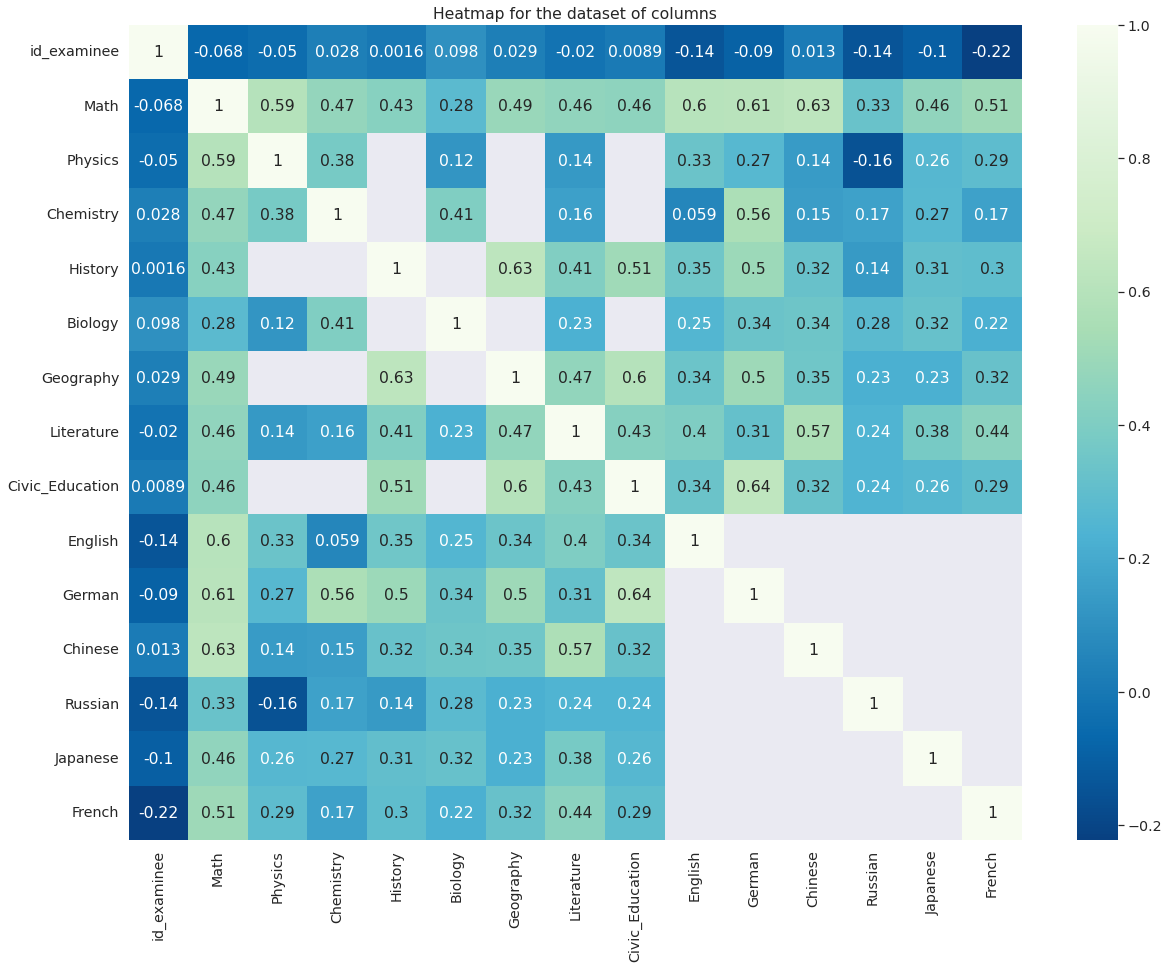

In [8]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.3)
sns.heatmap(examination_dataset[["id_examinee","Math", "Physics", "Chemistry", "History", "Biology", "Geography", 
                        "Literature", "Civic_Education", "English", "German", "Chinese", "Russian", "Japanese", "French"]].corr(), 
            cmap = "GnBu_r", annot = True)
plt.title("Heatmap for the dataset of columns")
plt.show()

3.2: Visualization the dataset with boxplot

In [9]:
# Select the continuous features
Math = examination_dataset["Math"]
Physics = examination_dataset["Physics"]
Chemistry = examination_dataset["Chemistry"]
Biology = examination_dataset["Biology"]
History = examination_dataset["History"]
Geography = examination_dataset["Geography"]
Literature = examination_dataset["Literature"]
Civic_Education = examination_dataset["Civic_Education"]
English = examination_dataset["English"]
German = examination_dataset["German"]
Chinese = examination_dataset["Chinese"]
Russian = examination_dataset["Russian"]
French = examination_dataset["French"]
Japanese = examination_dataset["Japanese"]

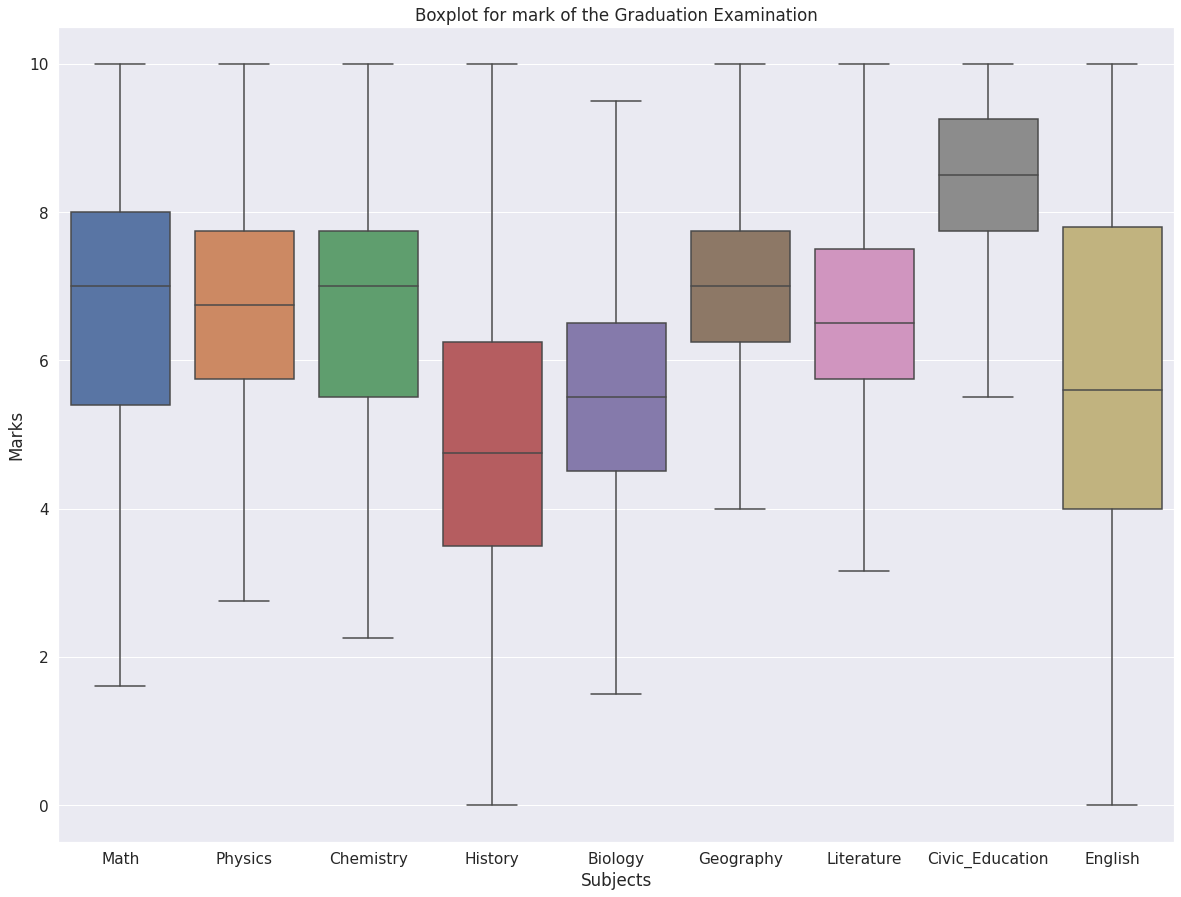

In [10]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.4)
dataset = pd.DataFrame(data = examination_dataset, columns = ["Math", "Physics", "Chemistry", "History", "Biology", "Geography", 
                        "Literature", "Civic_Education", "English"])
boxplot_dataset = sns.boxplot(x="variable", y="value", data=pd.melt(dataset), showfliers = False)
boxplot_dataset.set_xlabel("Subjects")
boxplot_dataset.set_ylabel("Marks")
plt.title("Boxplot for mark of the Graduation Examination")
plt.show()

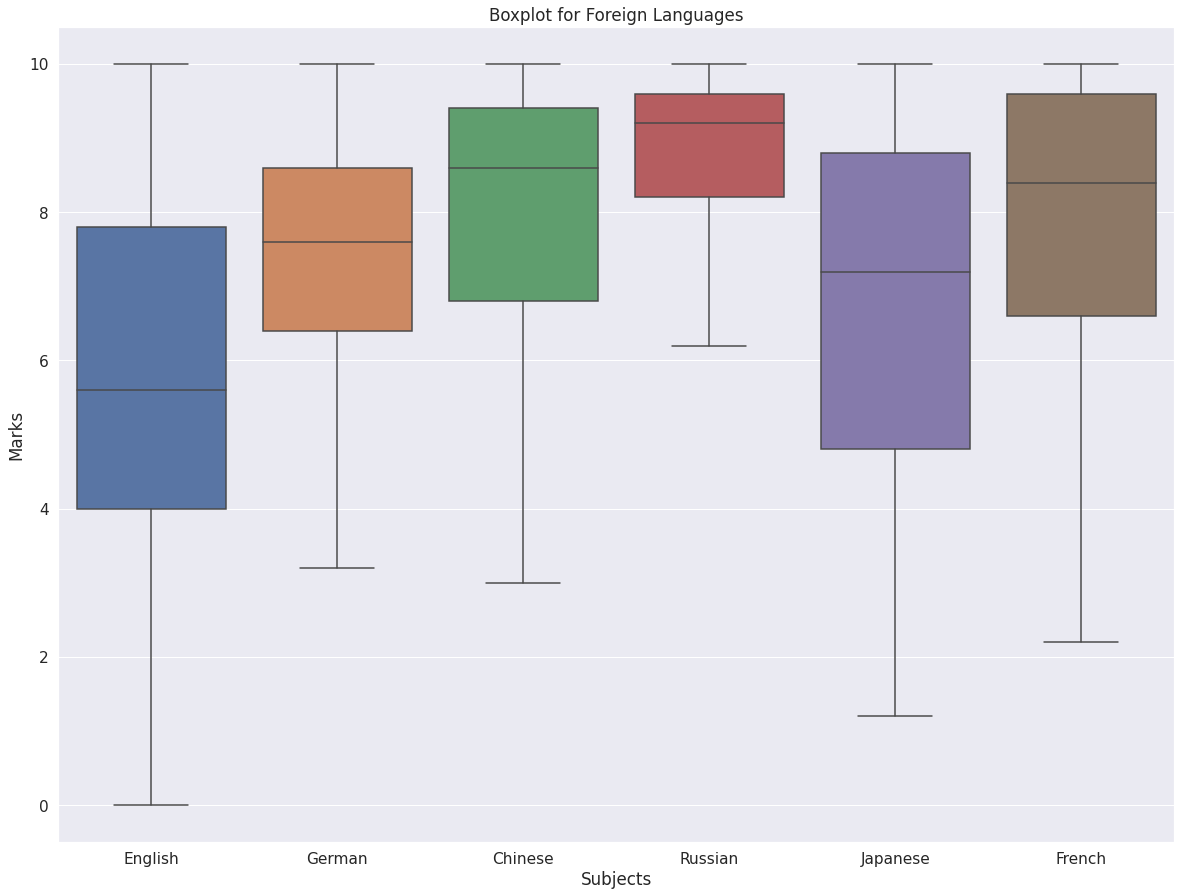

In [11]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.4)
dataset = pd.DataFrame(data = examination_dataset, columns = ["English", "German", "Chinese", "Russian", "Japanese", "French"])
boxplot_dataset = sns.boxplot(x="variable", y="value", data=pd.melt(dataset), showfliers = False)
boxplot_dataset.set_xlabel("Subjects")
boxplot_dataset.set_ylabel("Marks")
plt.title("Boxplot for Foreign Languages")
plt.show()

In [12]:
list(pd.isna(examination_dataset).any(axis=1)).count(False)

0

**4: Classification for the columns of the dataset for each papers**

In this notebook, we classfy for each of columns datasets, after we calculate the average of mark for each subjects and visulize for the information here. 


In [13]:
# Drooping and Cleaning the dataset of columns Math
math_papers = examination_dataset[["Math"]]
math_papers

,Math
0,9.2
1,4.4
2,8.4
3,8.8
4,8.0
...,...
934612,6.0
934613,5.0
934614,5.0
934615,4.4


In [14]:
math_dataset_cleaned = math_papers.dropna()
math_dataset_cleaned

,Math
0,9.2
1,4.4
2,8.4
3,8.8
4,8.0
...,...
934612,6.0
934613,5.0
934614,5.0
934615,4.4


In [15]:
# Drooping and Cleaning the dataset of columns Physics
physics_papers = examination_dataset[["Physics"]]
physics_papers

,Physics
0,NaN
1,NaN
2,4.00
3,8.25
4,NaN
...,...
934612,NaN
934613,NaN
934614,NaN
934615,NaN


In [16]:
physics_dataset_cleaned = physics_papers.dropna()
physics_dataset_cleaned

,Physics
2,4.00
3,8.25
5,7.25
8,8.75
15,7.50
...,...
934343,7.50
934344,8.00
934458,5.75
934472,7.50


In [17]:
# Drooping and Cleaning the dataset of columns English
english_papers = examination_dataset[["English"]]
english_papers

,English
0,10.0
1,NaN
2,10.0
3,9.4
4,8.6
...,...
934612,5.0
934613,4.4
934614,5.6
934615,4.6


In [18]:
english_dataset_cleaned = english_papers.dropna()
english_dataset_cleaned

,English
0,10.0
2,10.0
3,9.4
4,8.6
5,9.0
...,...
934612,5.0
934613,4.4
934614,5.6
934615,4.6


In [19]:
# Drooping and Cleaning the dataset of columns Chemistry
chemistry_papers = examination_dataset[["Chemistry"]]
chemistry_papers

,Chemistry
0,NaN
1,NaN
2,3.00
3,5.75
4,NaN
...,...
934612,NaN
934613,NaN
934614,NaN
934615,NaN


In [20]:
chemistry_dataset_cleaned = chemistry_papers.dropna()
chemistry_dataset_cleaned

,Chemistry
2,3.00
3,5.75
5,4.75
8,8.75
15,8.00
...,...
934343,7.75
934344,6.00
934458,4.75
934472,7.00


In [21]:
# Drooping and Cleaning the dataset of columns Literature
literature_papers = examination_dataset[["Literature"]]
literature_papers

,Literature
0,8.25
1,6.25
2,6.75
3,8.25
4,8.75
...,...
934612,5.00
934613,6.75
934614,5.00
934615,5.00


In [22]:
literature_dataset_cleaned = literature_papers.dropna()
literature_dataset_cleaned

,Literature
0,8.25
1,6.25
2,6.75
3,8.25
4,8.75
...,...
934612,5.00
934613,6.75
934614,5.00
934615,5.00


In [23]:
# Dropping and Cleaning the dataset of columns Biology
biology_papers = examination_dataset[["Biology"]]
biology_papers

,Biology
0,NaN
1,NaN
2,3.50
3,5.25
4,NaN
...,...
934612,NaN
934613,NaN
934614,NaN
934615,NaN


In [24]:
biology_dataset_cleaned = biology_papers.dropna()
biology_dataset_cleaned

,Biology
2,3.50
3,5.25
5,3.50
8,3.00
15,7.25
...,...
934313,8.75
934343,5.75
934344,7.25
934458,6.00


In [25]:
# Drooping and Cleaning the dataset of columns History
history_papers = examination_dataset[["History"]]
history_papers

,History
0,5.75
1,4.25
2,NaN
3,NaN
4,5.00
...,...
934612,9.00
934613,7.00
934614,6.50
934615,5.75


In [26]:
history_dataset_cleaned = history_papers.dropna()
history_dataset_cleaned

,History
0,5.75
1,4.25
4,5.00
6,2.25
7,5.25
...,...
934612,9.00
934613,7.00
934614,6.50
934615,5.75


In [27]:
# Drooping and Cleaning the dataset of columns Geography
geography_papers = examination_dataset[["Geography"]]
geography_papers

,Geography
0,9.75
1,4.00
2,NaN
3,NaN
4,6.50
...,...
934612,9.00
934613,7.50
934614,6.50
934615,8.25


In [28]:
geography_dataset_cleaned = geography_papers.dropna()
geography_dataset_cleaned

,Geography
0,9.75
1,4.00
4,6.50
6,7.00
7,8.00
...,...
934612,9.00
934613,7.50
934614,6.50
934615,8.25


In [29]:
# Drooping and Cleaning the dataset of columns Civic Education
civic_education_papers = examination_dataset[["Civic_Education"]]
civic_education_papers

,Civic_Education
0,9.25
1,NaN
2,NaN
3,NaN
4,9.25
...,...
934612,9.75
934613,9.00
934614,8.25
934615,8.75


In [30]:
civic_education_dataset_cleaned = civic_education_papers.dropna()
civic_education_dataset_cleaned

,Civic_Education
0,9.25
4,9.25
7,9.00
9,8.50
10,7.50
...,...
934612,9.75
934613,9.00
934614,8.25
934615,8.75


**5: Visualization for the average score for each papers**

In [31]:
# Compute the average score for each papers
math_average = np.average(math_dataset_cleaned)
physics_average = np.average(physics_dataset_cleaned)
chemistry_average = np.average(chemistry_dataset_cleaned)
english_average = np.average(english_dataset_cleaned)
literature_average = np.average(literature_dataset_cleaned)
biology_average = np.average(biology_dataset_cleaned)
history_average = np.average(history_dataset_cleaned)
geography_average = np.average(geography_dataset_cleaned)
civic_education_average = np.average(civic_education_dataset_cleaned)

print("The GPA of Maths: ", round(math_average, 2))
print("The GPA of Physics: ", round(physics_average, 2))
print("The GPA of Chemistry: ", round(chemistry_average, 2))
print("The GPA of Biology: ", round(biology_average, 2))
print("The GPA of English: ", round(english_average, 2))
print("The GPA of Literature: ", round(literature_average, 2))
print("The GPA of History: ", round(history_average, 2))
print("The GPA of Geography: ", round(geography_average, 2))
print("The GPA of Civic Education: ", round(civic_education_average, 2))

The GPA of Maths:  6.62
The GPA of Physics:  6.58
The GPA of Chemistry:  6.63
The GPA of Biology:  5.52
The GPA of English:  5.85
The GPA of Literature:  6.48
The GPA of History:  4.98
The GPA of Geography:  6.96
The GPA of Civic Education:  8.38


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GPA for each papers')

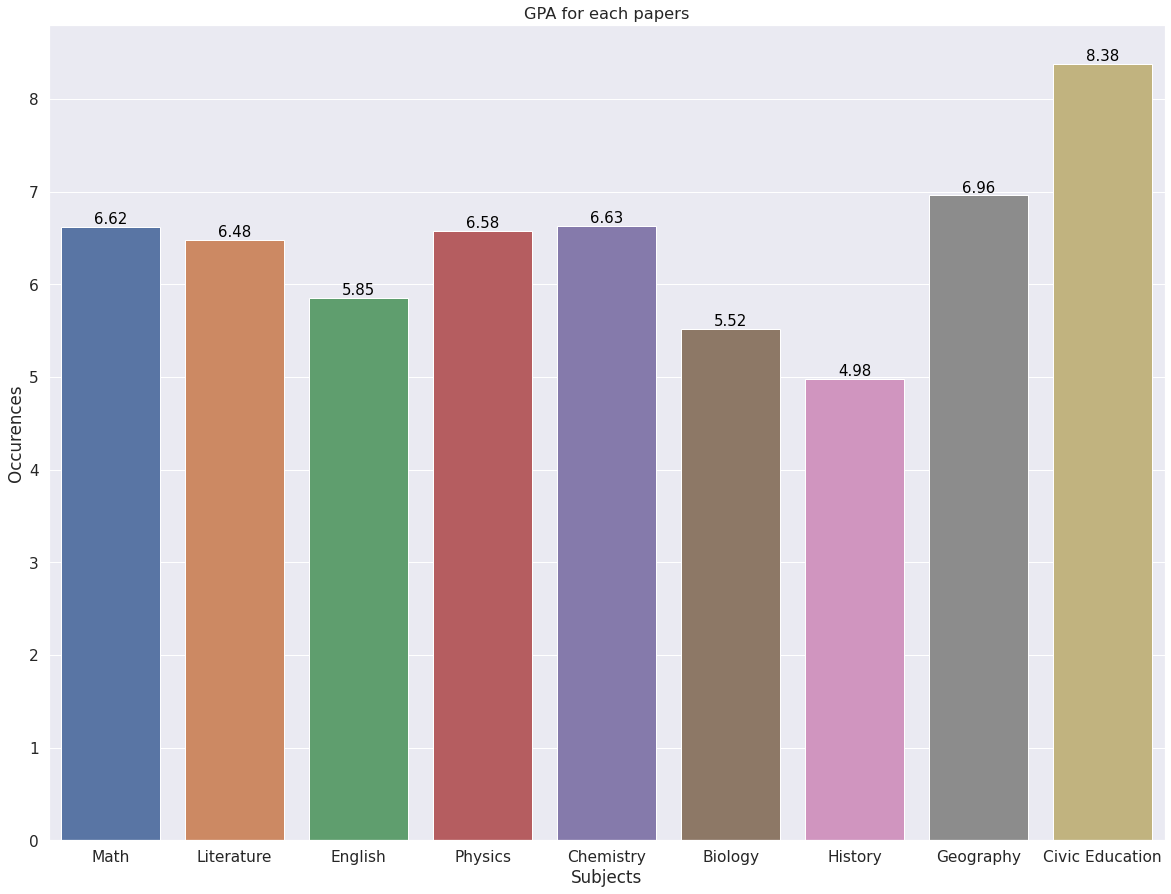

In [32]:
# Round the score to the 2nd point
math_round_score = round(math_average, 2)
physics_round_score =  round(physics_average, 2)
chemistry_round_score = round(chemistry_average, 2)
biology_round_score = round(biology_average, 2)
english_round_score = round(english_average, 2)
literature_round_score = round(literature_average, 2)
history_round_score = round(history_average, 2)
geography_round_score = round(geography_average, 2)
civic_education_round_score = round(civic_education_average, 2)

labels_average = ["Math", "Literature", "English", "Physics", "Chemistry", "Biology", "History",
                    "Geography", "Civic Education"]
counts_average_round = [math_round_score, literature_round_score, english_round_score, physics_round_score, chemistry_round_score,
                        biology_round_score, history_round_score, geography_round_score, civic_education_round_score]

fig, ax = plt.subplots(figsize = (20, 15))
sns.set(font_scale = 1.35)
score_average = sns.barplot(labels_average, counts_average_round)

for counts_10 in score_average.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Subjects")
plt.ylabel("Occurences")
plt.title("GPA for each papers")

In the bar chat, we can see that the average score of Civic Education papers higher than with the other papers.



*   The structure of examination was easier than 2-3 years ago
*   Especially the examination structure of Civic Education reality in socially and comfortable with everyone



**6: Visualiaztion the Combination for Graduation Examination**

In [33]:
"Count the none-null value in Social Sciene, Natural Science, and null values"
# Natural Science
sum_of_NS = sum((examination_dataset.Physics >= 0) | (examination_dataset.Chemistry >= 0) | (examination_dataset.Biology >= 0))
print("Natural Science:",sum_of_NS)

# Social Science
sum_of_SS = sum((examination_dataset.History >= 0) | (examination_dataset.Geography >= 0) | (examination_dataset.Civic_Education >= 0))
print("Social Science:", sum_of_SS)

# Null information
sum_of_Null = sum(examination_dataset.id_examinee >= 0) - sum_of_NS - sum_of_SS
print("Null:", sum_of_Null)

Natural Science: 329274
Social Science: 601299
Null: 4044


6.1: Visualize with bar chart

Text(0.5, 1.0, 'Bar Chart of Combination Exam Selection')

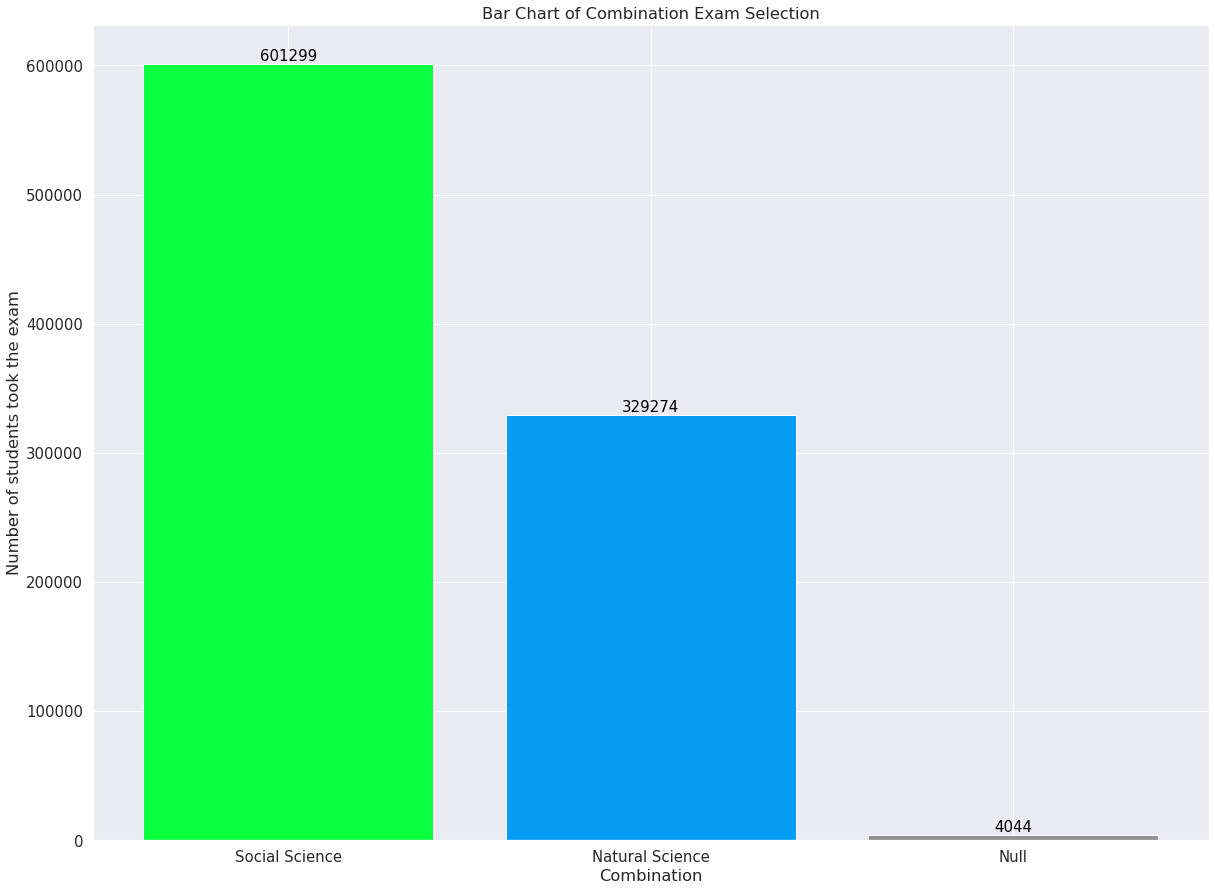

In [34]:
# Bar chart for combination exam selection
labels = ["Social Science", "Natural Science", "Null"]
count = [sum_of_SS, sum_of_NS, sum_of_Null]
colors = ["#0AFF3F", "#059DF3" ,"#939393"]

plt.figure(figsize = (20, 15))
counts_grouped = plt.bar(labels, count, color = colors)

for counts in counts_grouped.patches:
  bar_height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / bar_height + bar_height
  plt.text(label_x, label_y, s = f"{bar_height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Combination")
plt.ylabel("Number of students took the exam")
plt.title("Bar Chart of Combination Exam Selection")

6.2: Visualize with pie chart

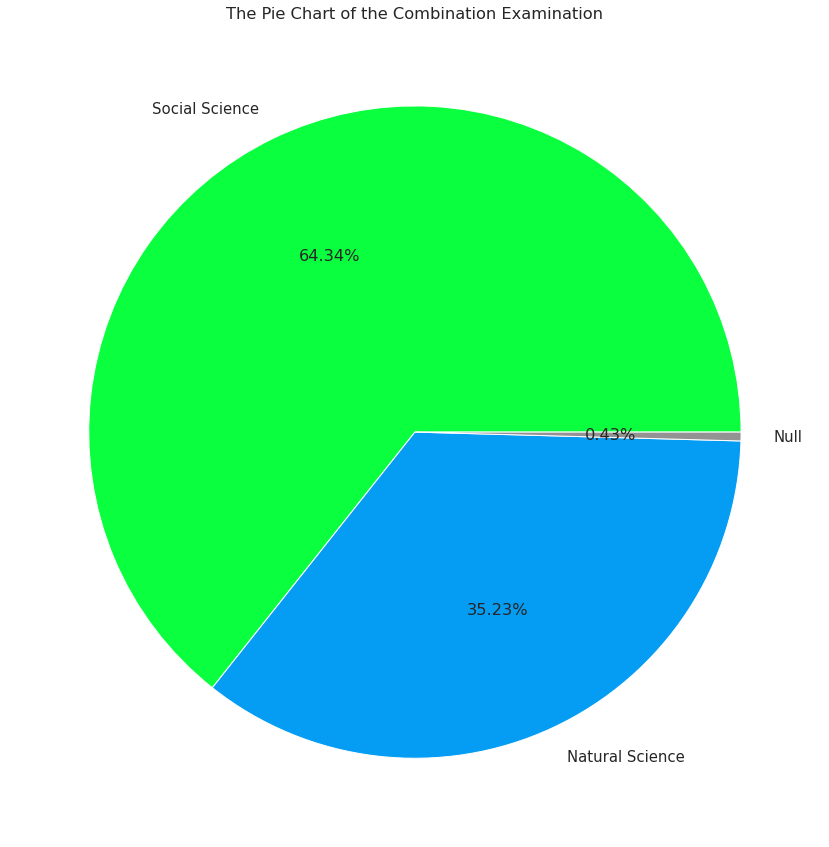

In [35]:
# Create pie chart
plt.figure(figsize = (20, 15))
plt.pie(count, labels = labels, colors = colors, autopct='%0.2f%%')
plt.title("The Pie Chart of the Combination Examination")
plt.show()

In the bar chart, we can see that: the number of students taking Social Science combination significantly surpassed Natural Science. Based on the visualization in the bar chart, it is considered the number of subscriptions to Social Science seems to be twice that of Natural Science. However, it is doubted that choosing Social Science can guarantee candidates a higher score?

**7: Visualization for the examiee has taken 10 points in papers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '10 Point Distributions')

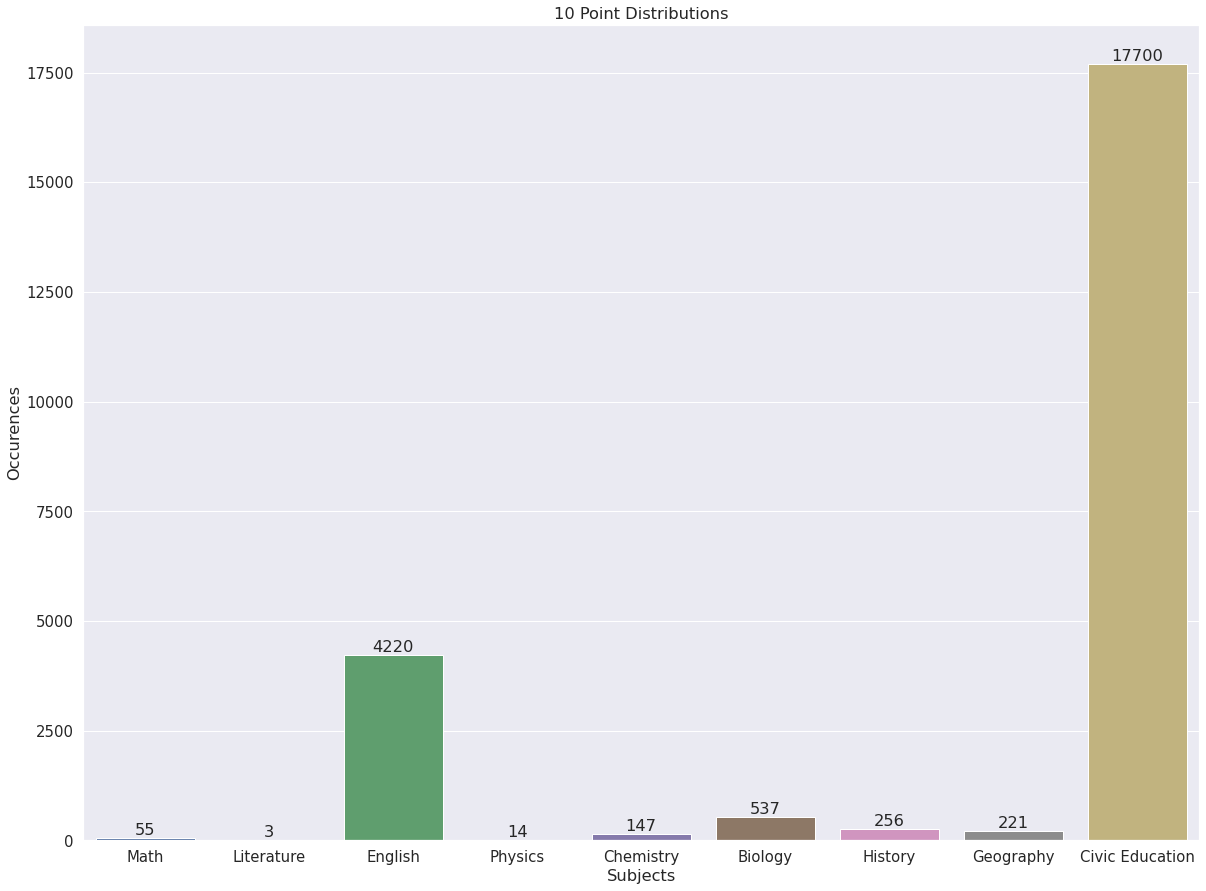

In [36]:
# Count the number has score 10
math_10_score = sum(examination_dataset.Math == 10)
literature_10_score = sum(examination_dataset.Literature == 10)
english_10_score = sum(examination_dataset.English == 10)
physics_10_score = sum(examination_dataset.Physics == 10)
chemistry_10_score = sum(examination_dataset.Chemistry == 10)
biology_10_score = sum(examination_dataset.Biology == 10)
history_10_score = sum(examination_dataset.History == 10)
geography_10_score = sum(examination_dataset.Geography == 10)
civic_education_10_score = sum(examination_dataset.Civic_Education == 10)

labels_10_score = ["Math", "Literature", "English", "Physics", "Chemistry", "Biology", "History",
                    "Geography", "Civic Education"]
counts_10_score = [math_10_score, literature_10_score, english_10_score, physics_10_score, chemistry_10_score,
                    biology_10_score, history_10_score, geography_10_score, civic_education_10_score]

fig, ax = plt.subplots(figsize = (20, 15))
sns.set(font_scale = 1.35)
score_10_grouped = sns.barplot(labels_10_score, counts_10_score)
score_10_grouped.set_xticklabels(score_10_grouped.get_xticklabels())
ax.bar_label(ax.containers[0])

plt.xlabel("Subjects")
plt.ylabel("Occurences")
plt.title("10 Point Distributions")

In [37]:
# Sum the examiee has taken 10 score
examinees_10_score = np.sum(counts_10_score)
print("Sum of examiee has taken 10 score are:", examinees_10_score)

Sum of examiee has taken 10 score are: 23153


**8: Visualization for the Distribution of score with each papers**

In this notebook, we analyze the distribution scores for each papers and visualization for the information with bar chart graph, including:
1. **3 compulsory independent tests:** Math, Literature and Foreign Language (Usually choose English)
2. **The combination of Natural Science:** Physics, Chemistry and Biology
3. **The combination of Social Science:** History, Geography and Civic Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Math Score Distribution')

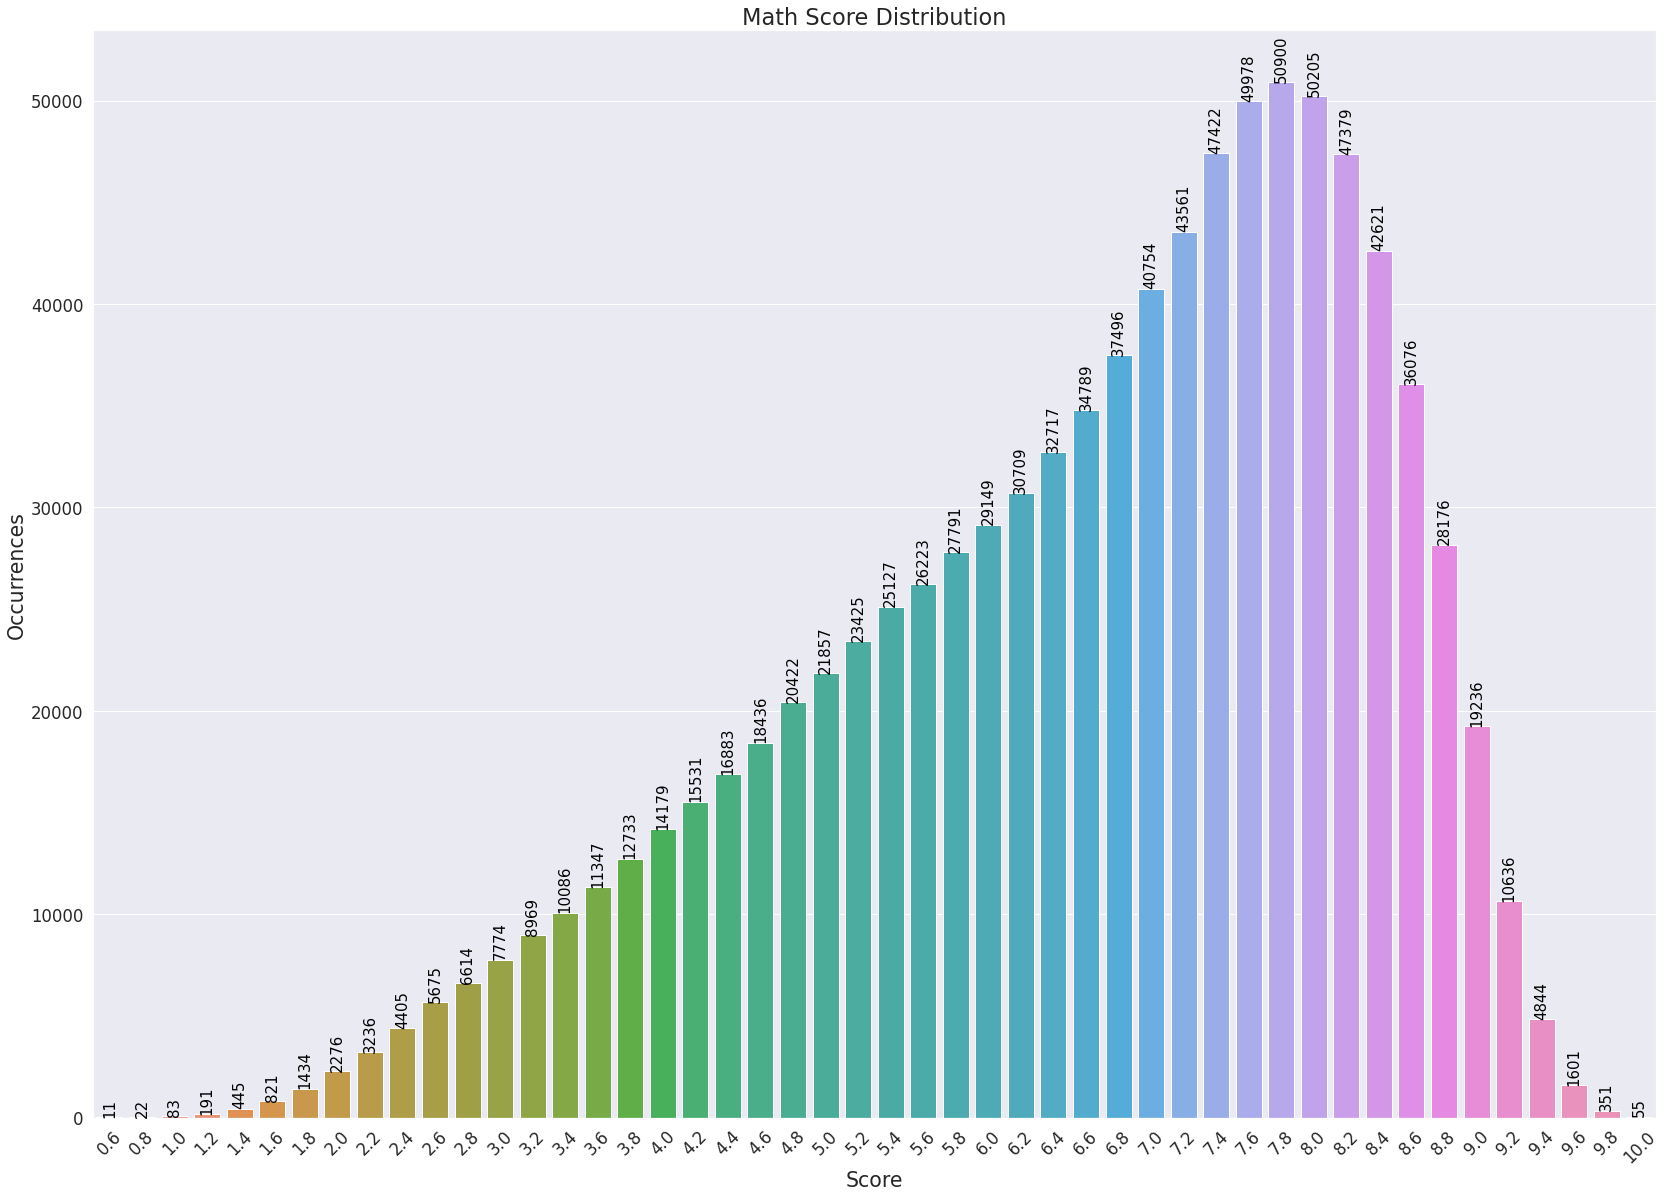

In [38]:
# Count of the occurence of Math score
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.5)
math_sns = sns.countplot(examination_dataset.Math)
math_sns.set_xticklabels(math_sns.get_xticklabels(), rotation = 45)

for counts in math_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("Math Score Distribution", fontsize = 22.5)

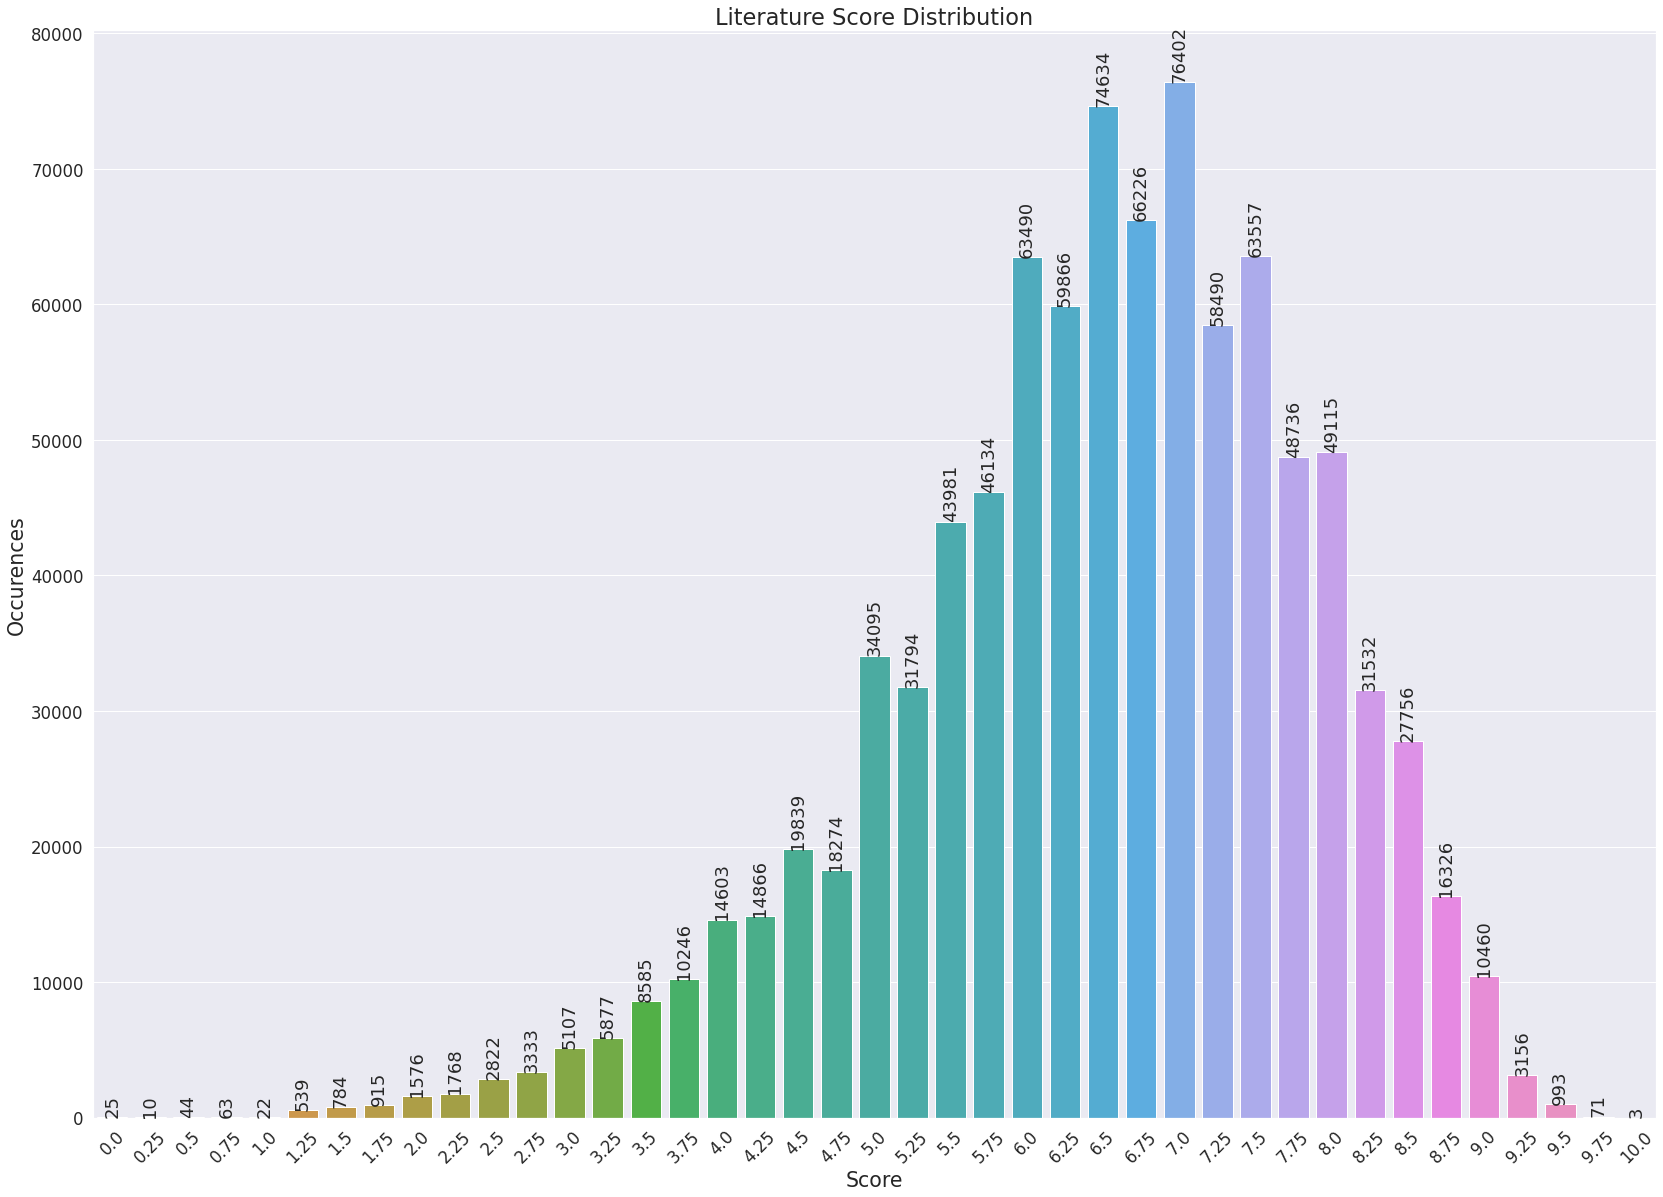

In [39]:
# Count the occurence of Literature score
## Literature is conducted as an essay exam so its point unit is 0.25
x = 0
list_score = []
list_occurences = []

while (x <= 10):
  list_score.append(x)
  if (x in examination_dataset.Literature.values):
    list_count = examination_dataset.Literature.value_counts()[x].item()
    
    list_occurences.append(list_count)
    x = round(x + 0.25, 2)
  else:
    
    list_occurences.append(0)
    x = round(x + 0.25, 2)

# Literature score distribution
fig, ax = plt.subplots(figsize = (28, 20))
literature_sns = sns.barplot(x = list_score, y = list_occurences,ax = ax)
literature_sns.set_xticklabels(literature_sns.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0], rotation = 90)

plt.title("Literature Score Distribution", fontsize = 22.5)
plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurences", fontsize = 20.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'English Score Distribution')

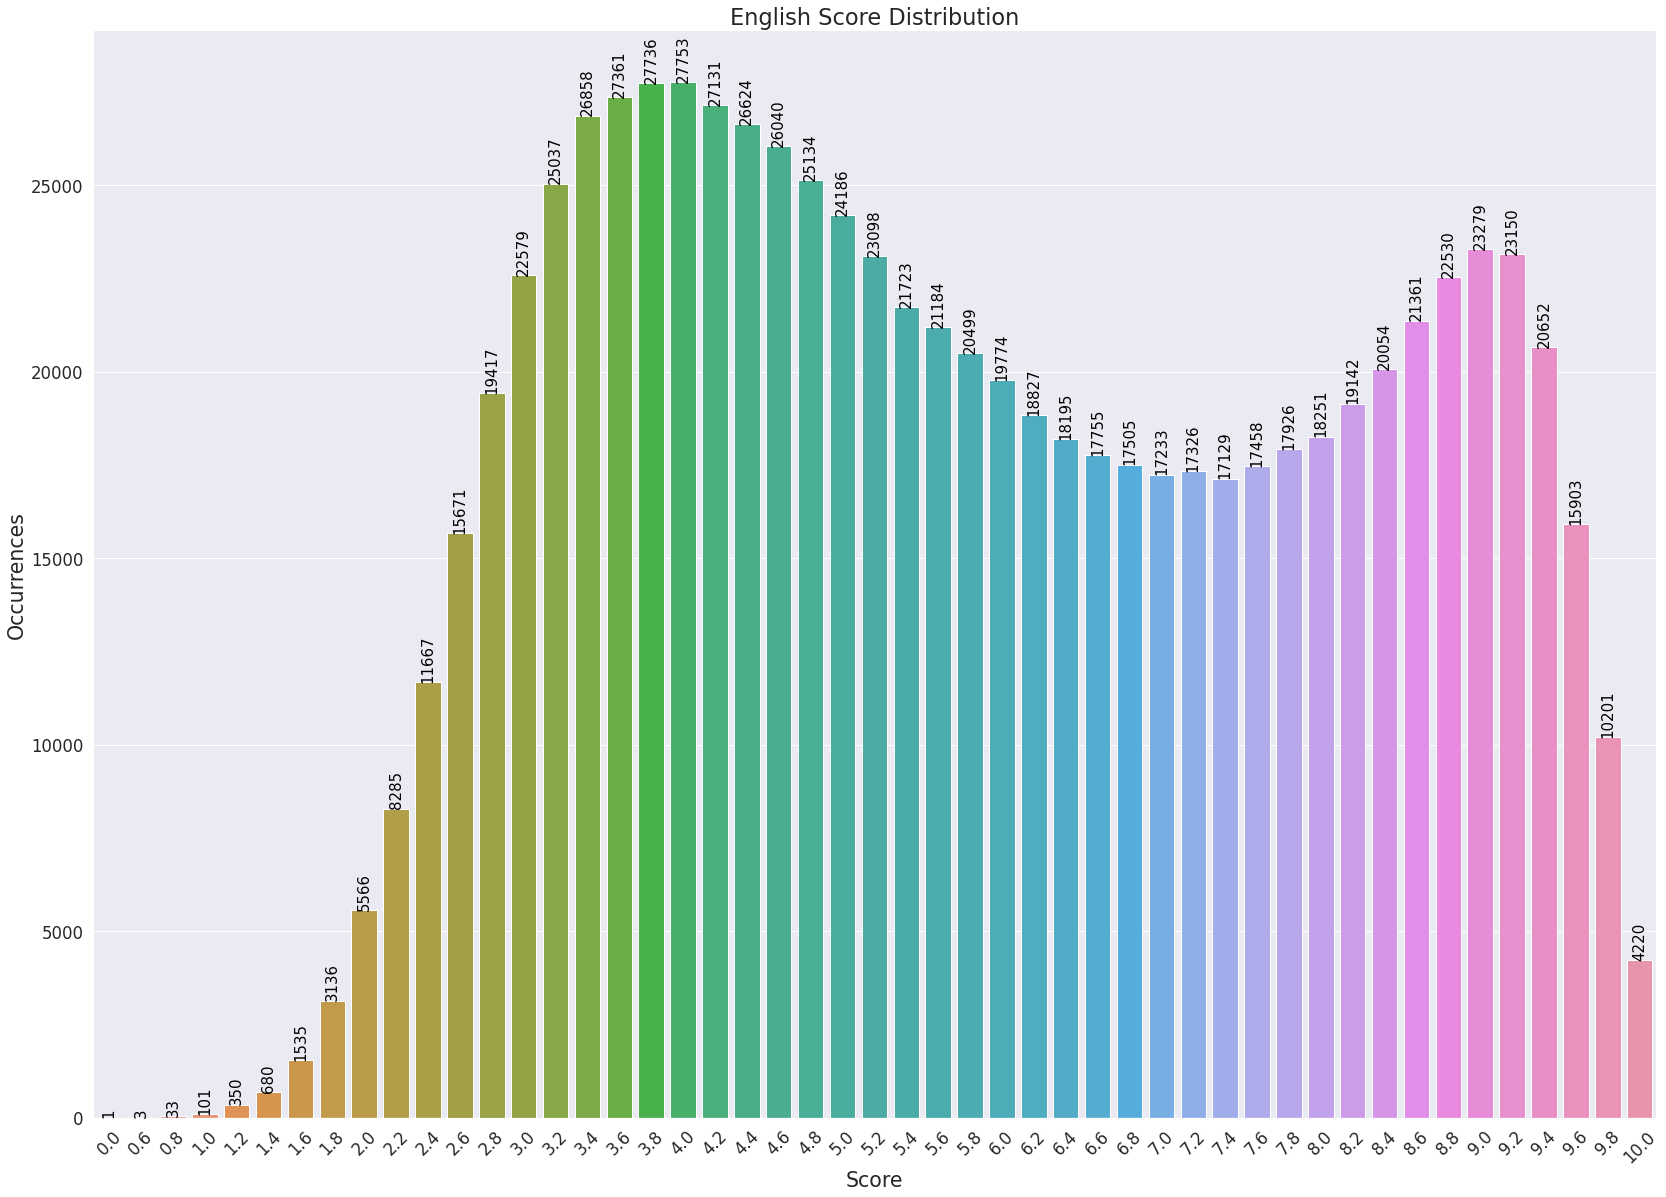

In [40]:
# Count the occurence of English score
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.5)
english_sns = sns.countplot(examination_dataset.English)
english_sns.set_xticklabels(english_sns.get_xticklabels(), rotation = 45)

for counts in english_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("English Score Distribution", fontsize = 22.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Physics Score Distribution')

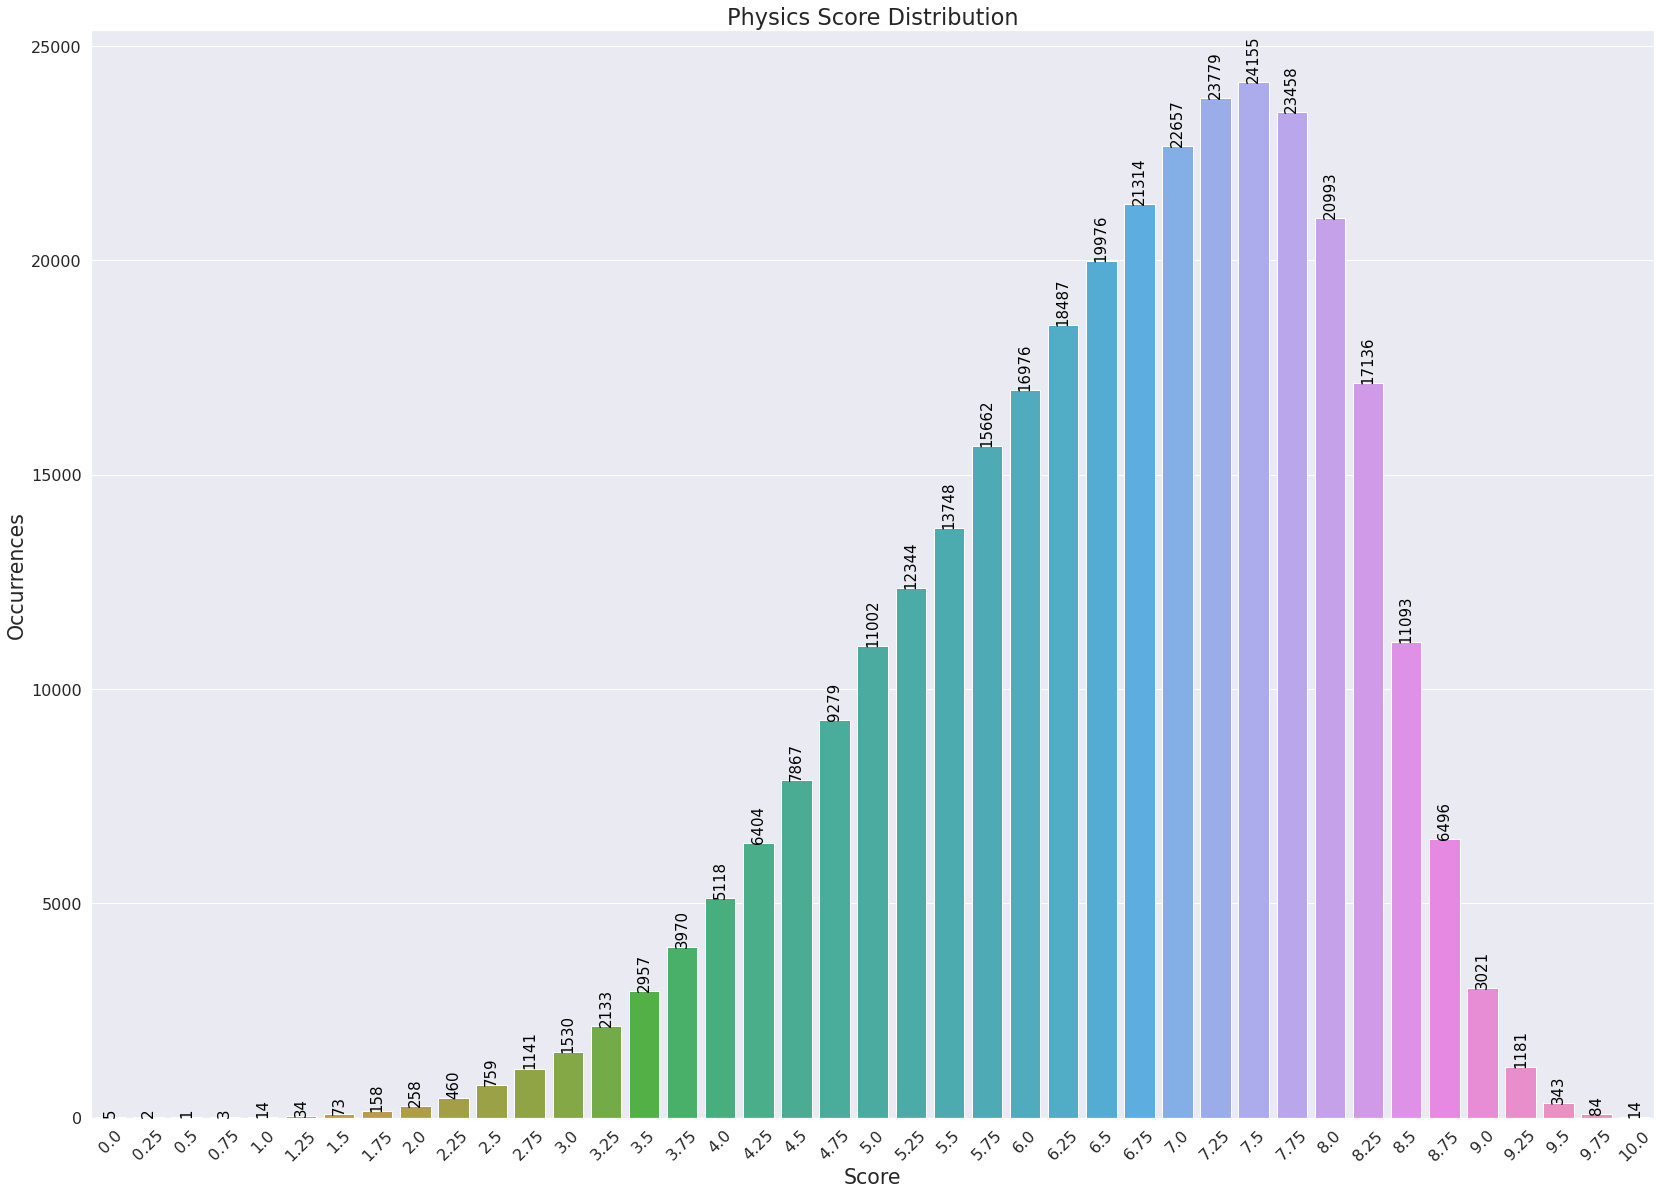

In [41]:
# Count the occurence of Physics papers
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.45)
physics_sns = sns.countplot(examination_dataset.Physics)
physics_sns.set_xticklabels(physics_sns.get_xticklabels(), rotation = 45)

for counts in physics_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("Physics Score Distribution", fontsize = 22.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Chemistry Score Distribution')

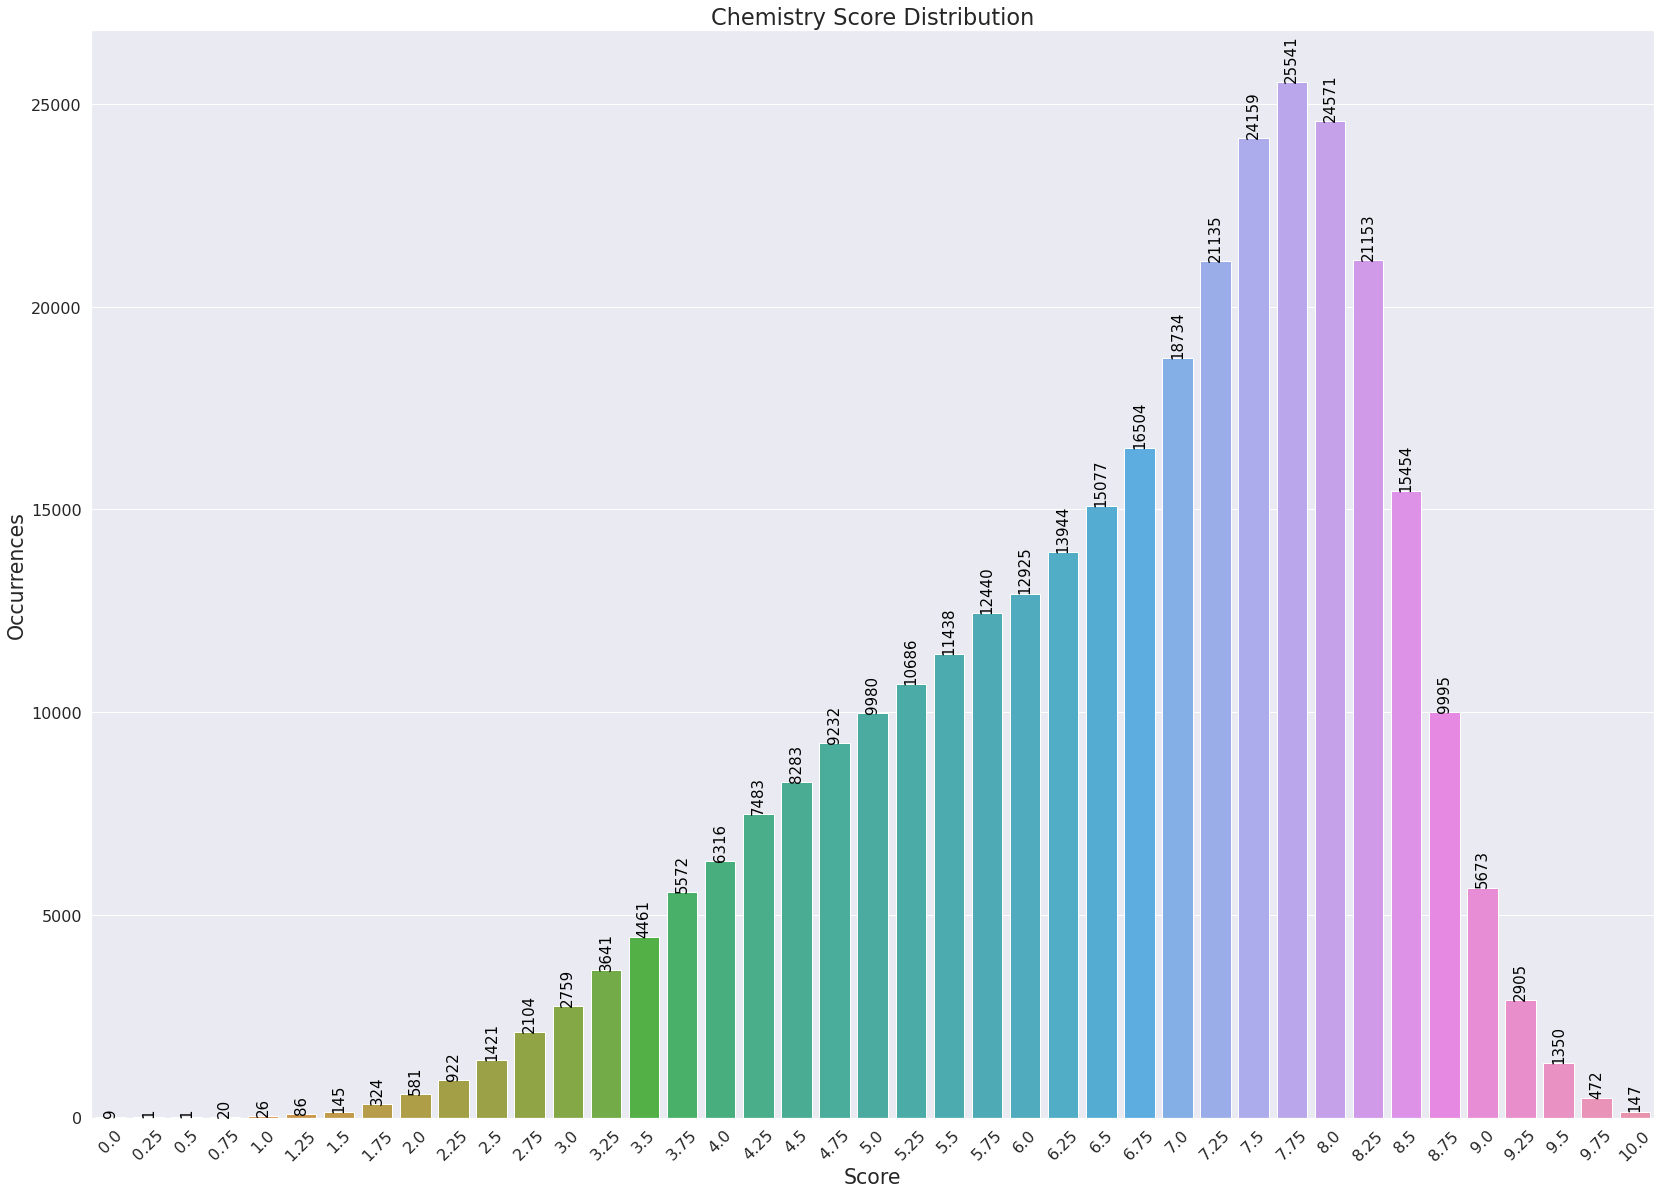

In [42]:
# Count the occurence of Chemistry papers
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.45)
chemistry_sns = sns.countplot(examination_dataset.Chemistry)
chemistry_sns.set_xticklabels(chemistry_sns.get_xticklabels(), rotation = 45)

for counts in chemistry_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("Chemistry Score Distribution", fontsize = 22.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Biology Score Distribution')

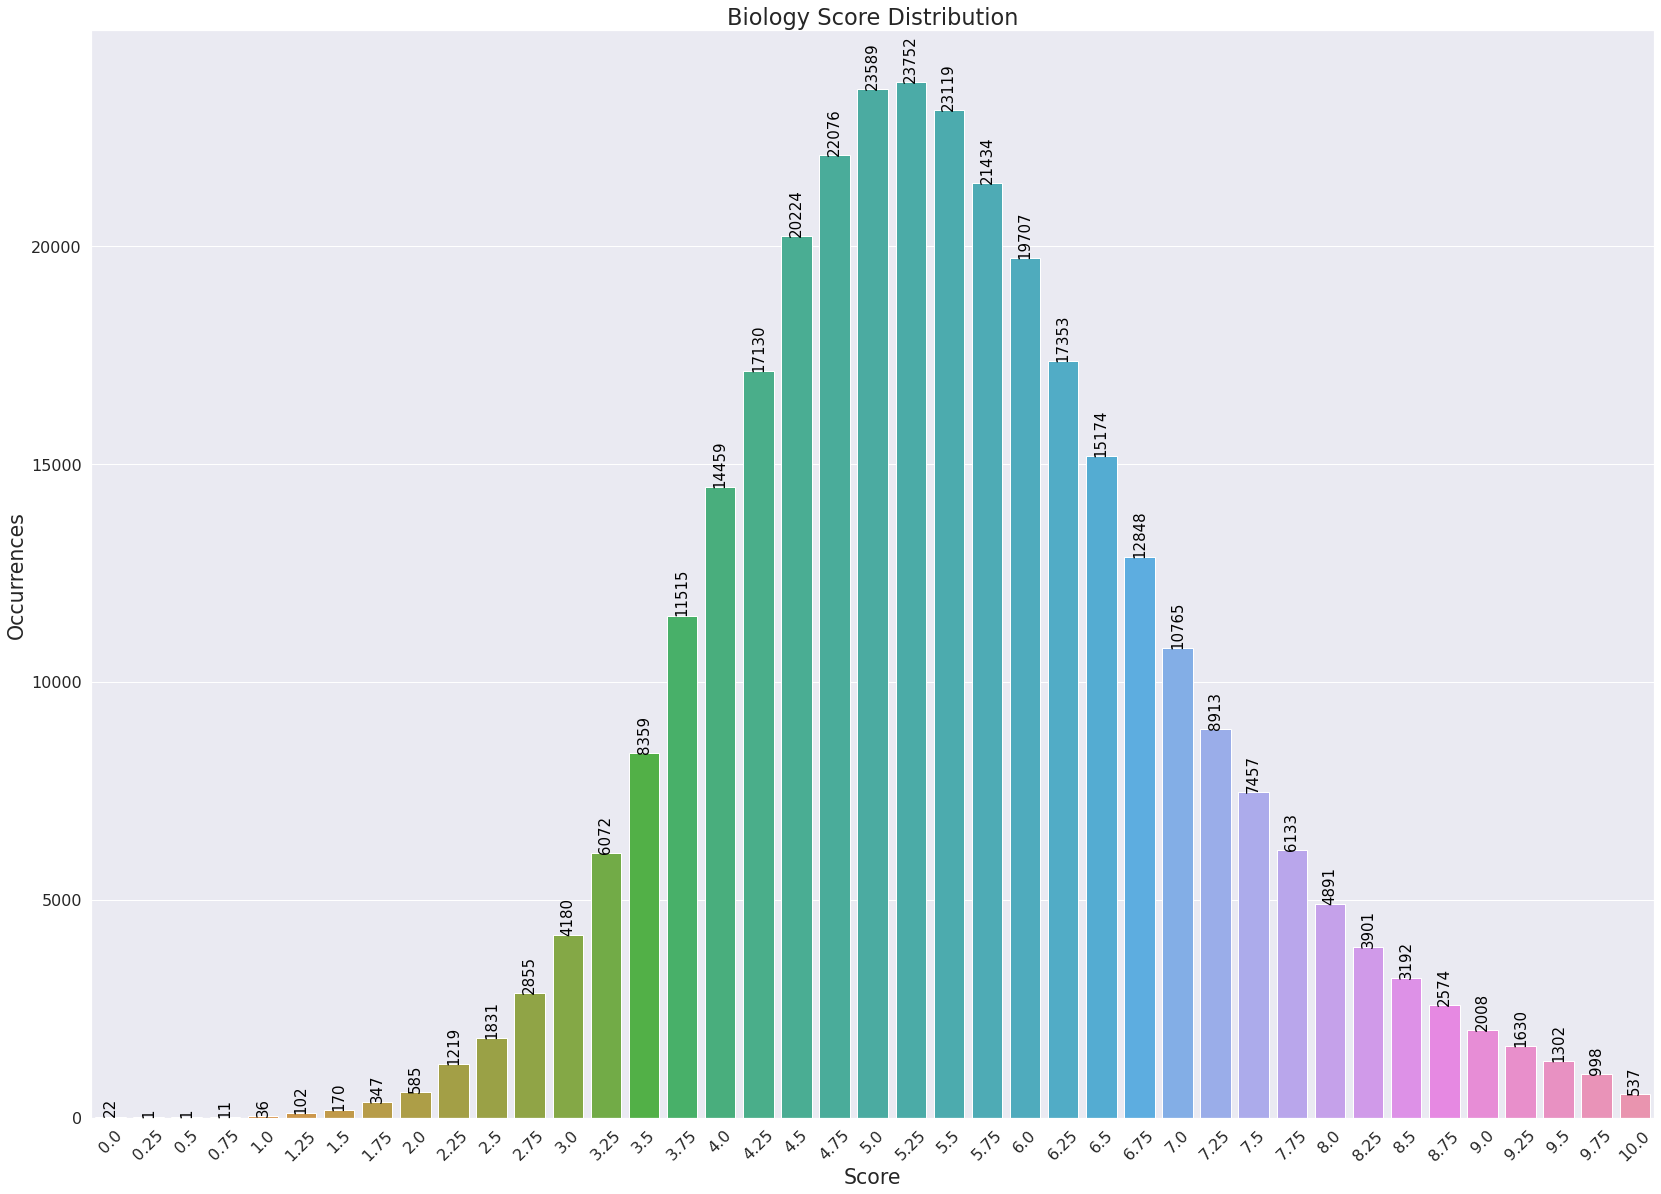

In [43]:
# Count the occurence of Biology score
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.45)
biology_sns = sns.countplot(examination_dataset.Biology)
biology_sns.set_xticklabels(biology_sns.get_xticklabels(), rotation = 45)

for counts in biology_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("Biology Score Distribution", fontsize = 22.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'History Score Distribution')

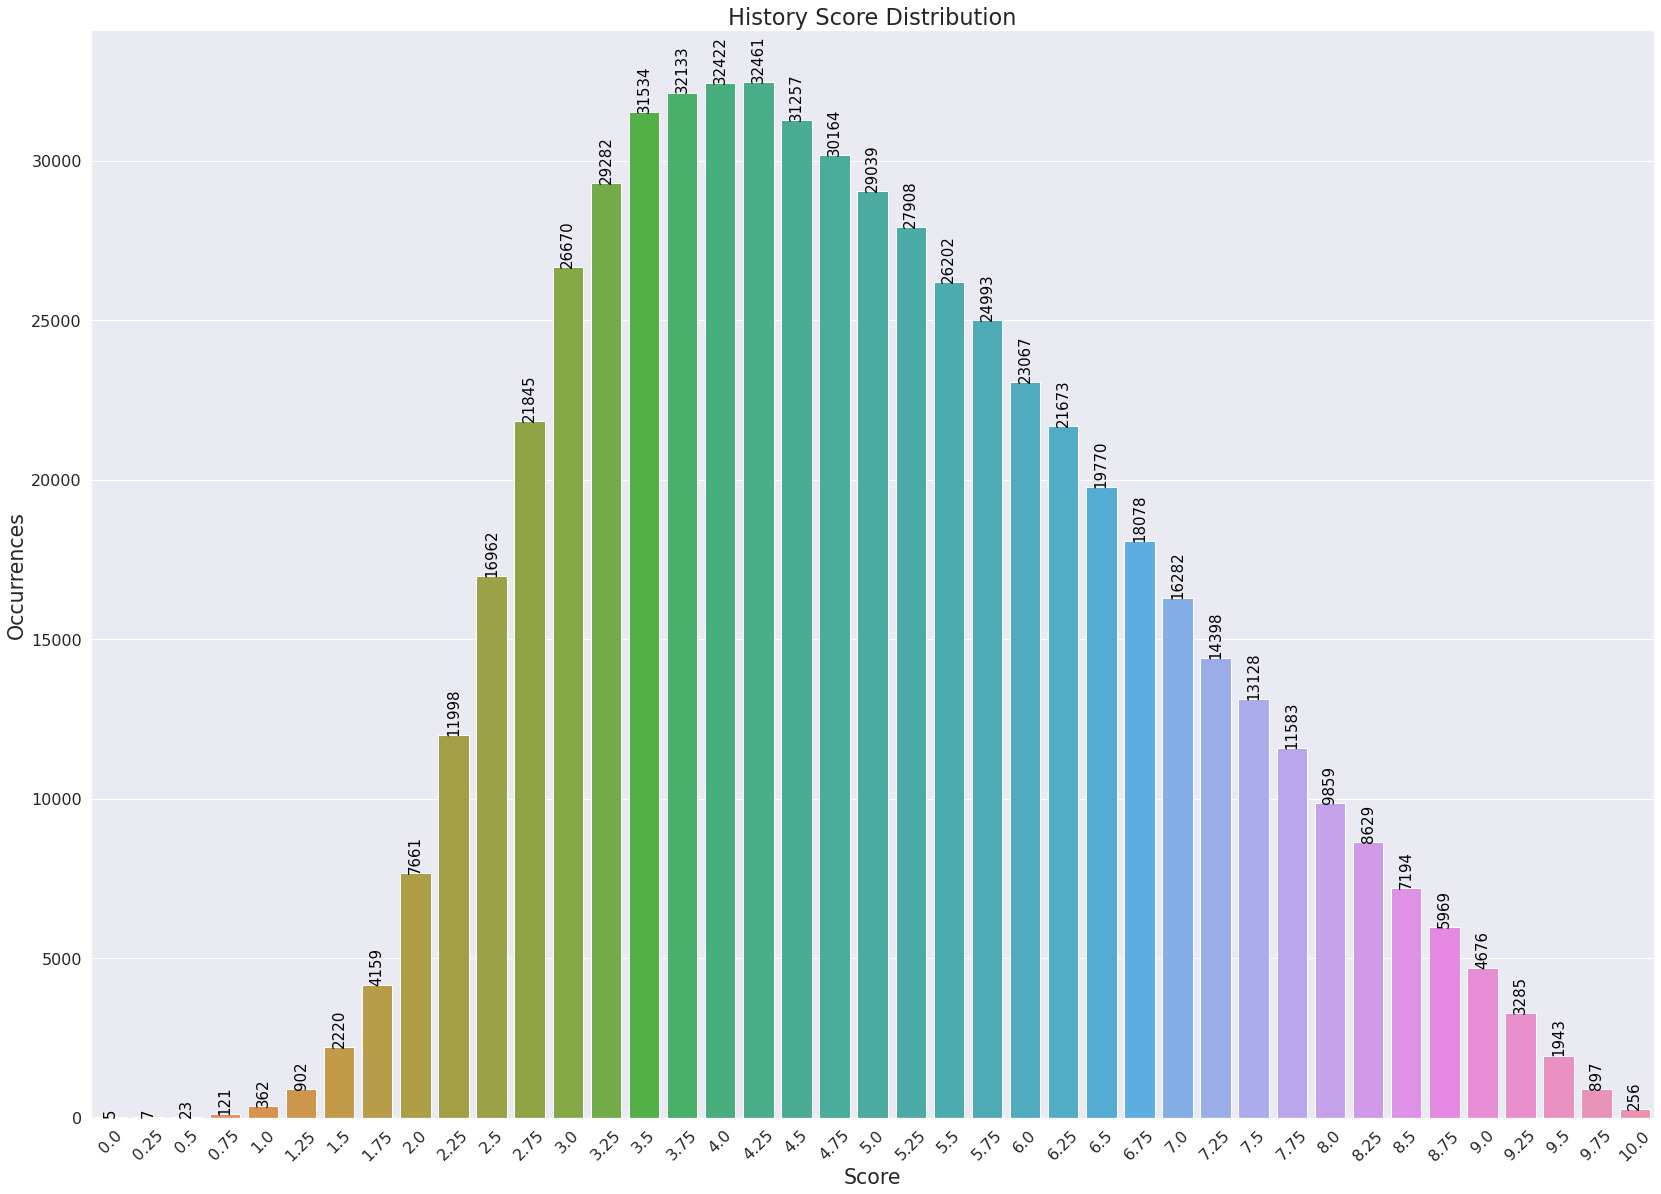

In [44]:
# Count the occurence of History score
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.45)
history_sns = sns.countplot(examination_dataset.History)
history_sns.set_xticklabels(history_sns.get_xticklabels(), rotation = 45)

for counts in history_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("History Score Distribution", fontsize = 22.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Geography Score Distribution')

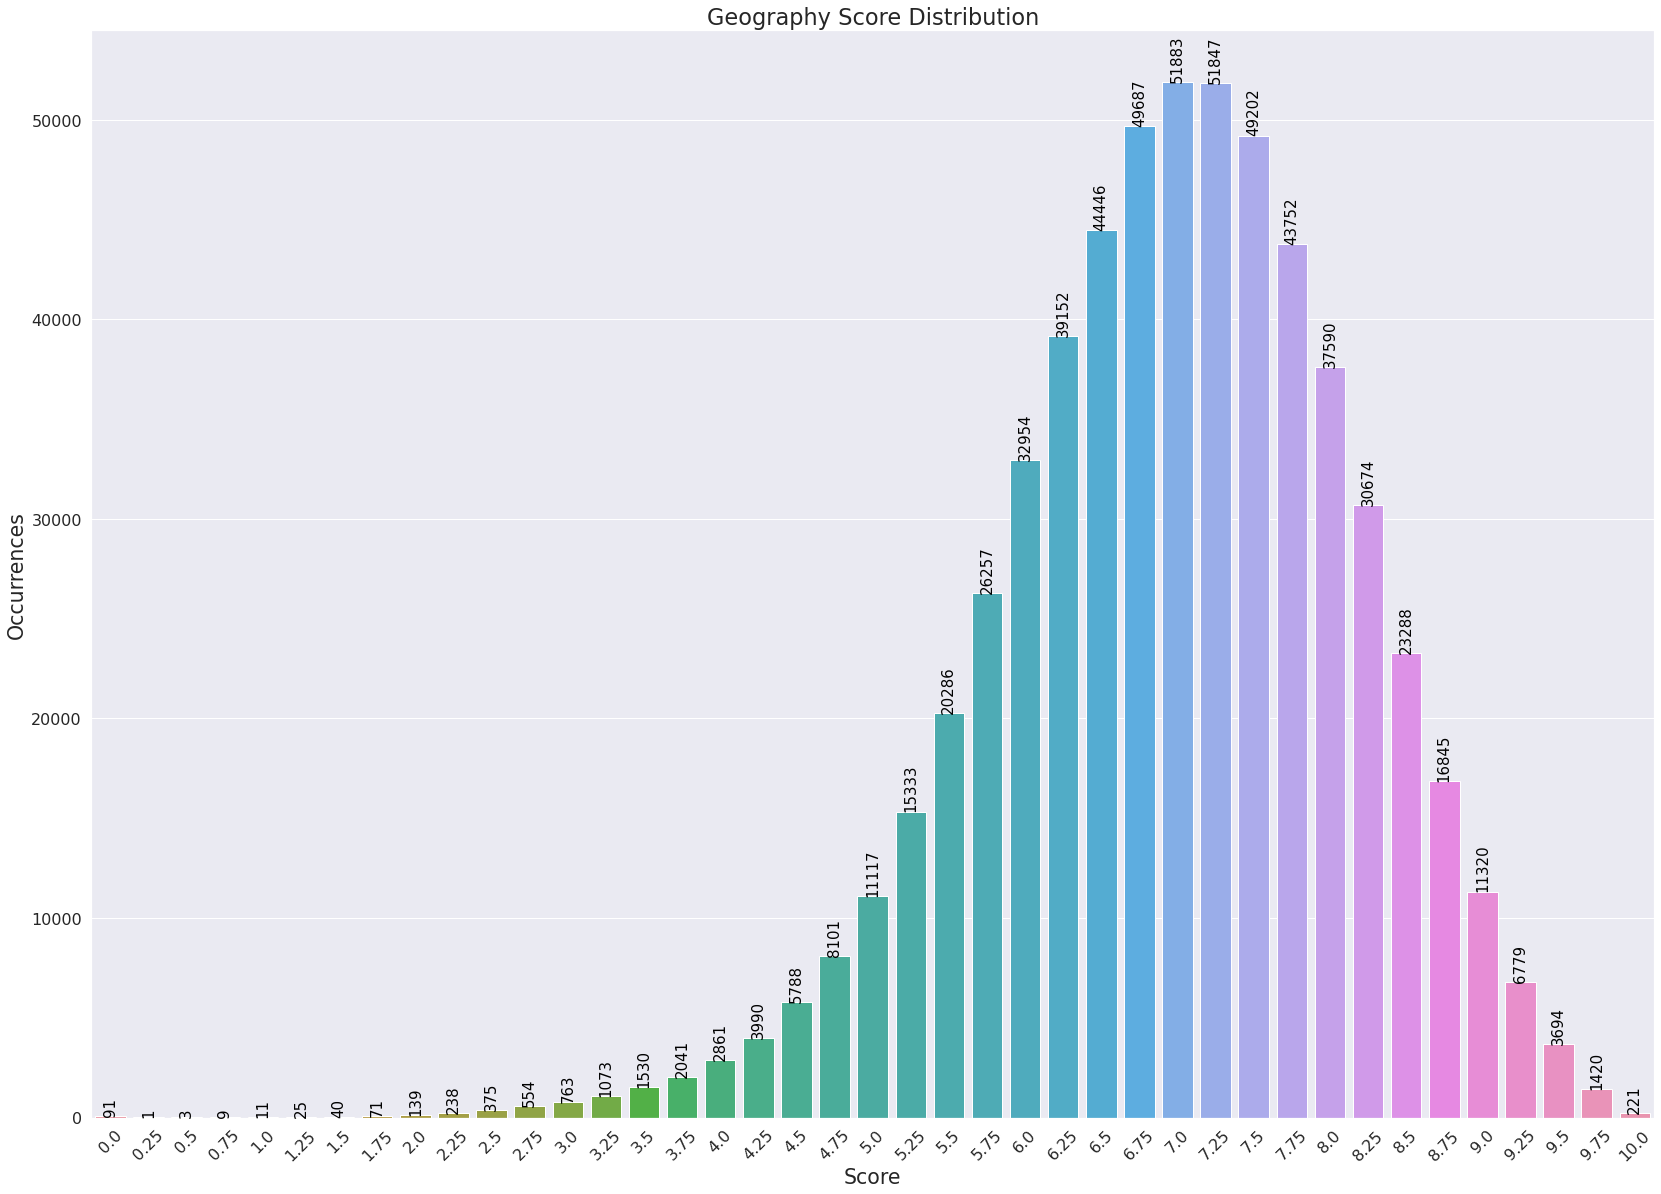

In [45]:
# Count the occurence of Geography score
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.45)
geography_sns = sns.countplot(examination_dataset.Geography)
geography_sns.set_xticklabels(geography_sns.get_xticklabels(), rotation = 45)

for counts in geography_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("Geography Score Distribution", fontsize = 22.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Civic Education Score Distribution')

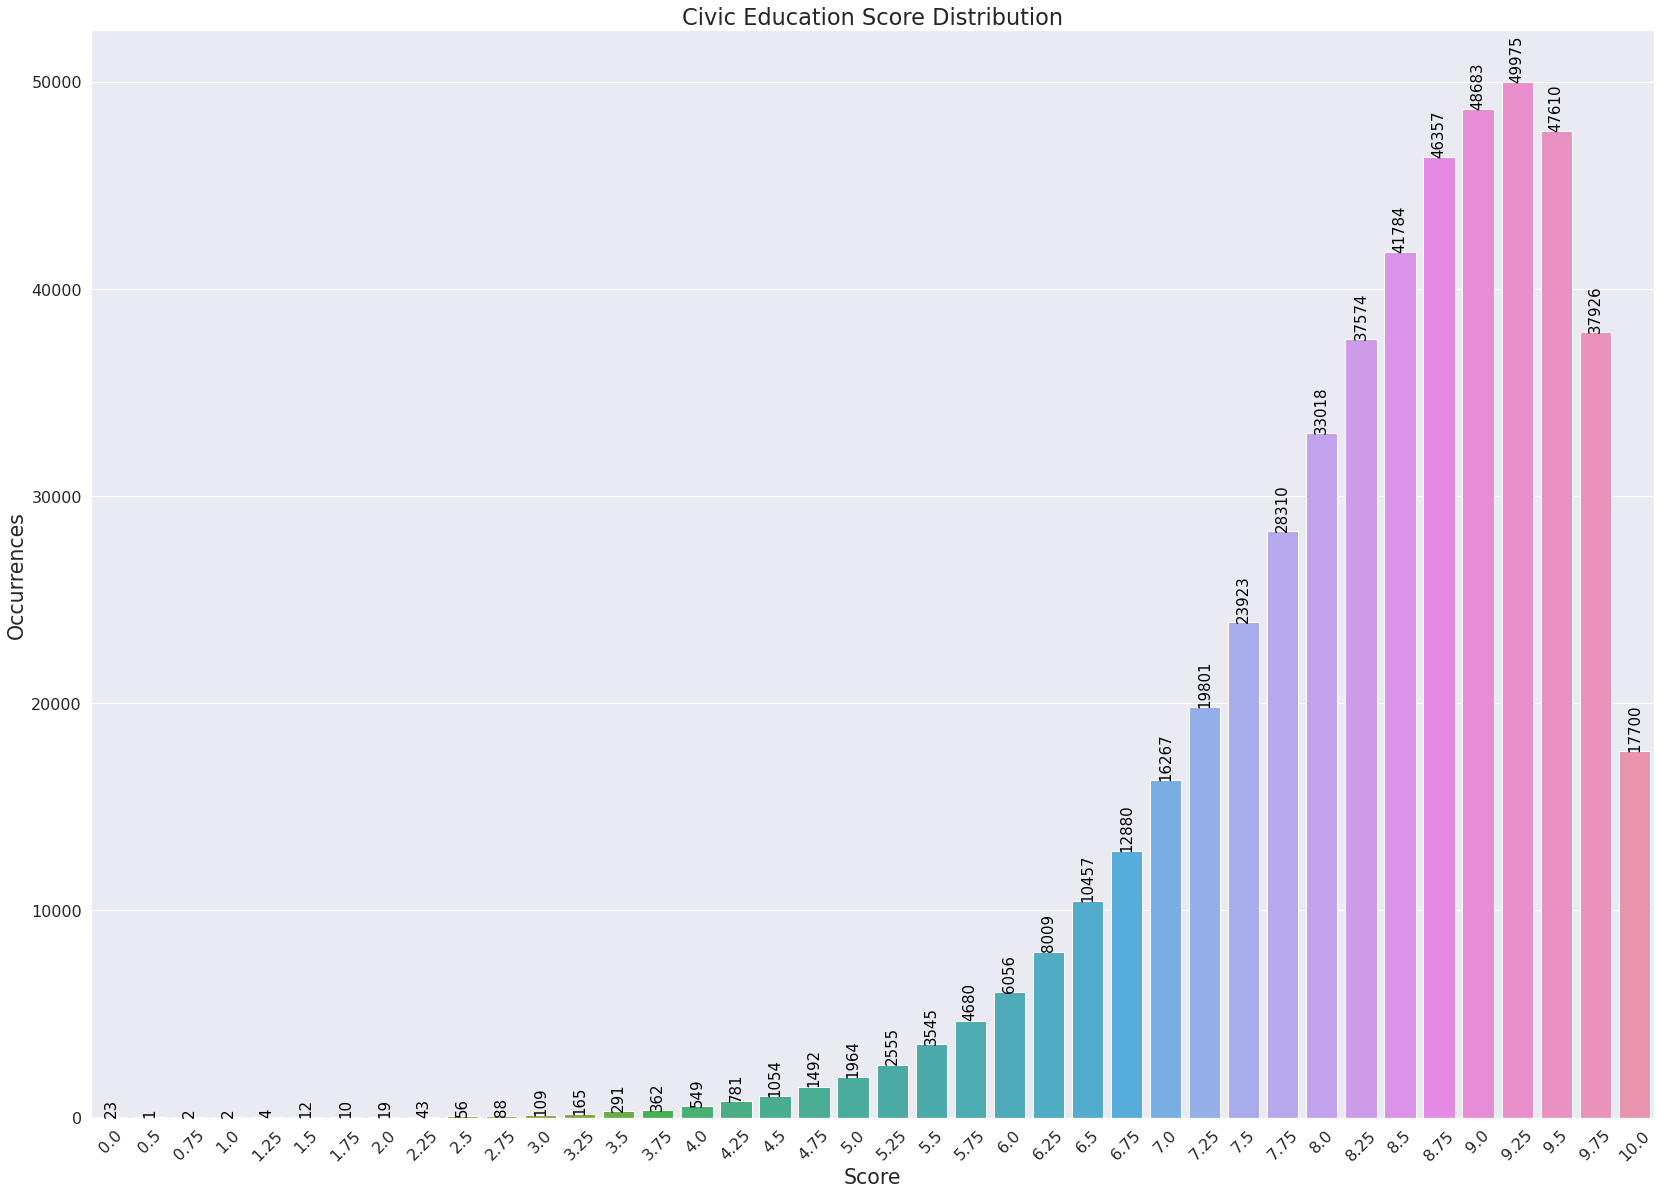

In [46]:
# Count the occurence of Civic Education score
plt.figure(figsize = (28, 20))
sns.set(font_scale = 1.45)
civic_education_sns = sns.countplot(examination_dataset.Civic_Education)
civic_education_sns.set_xticklabels(civic_education_sns.get_xticklabels(), rotation = 45)

for counts in civic_education_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15, rotation = 90)

plt.xlabel("Score", fontsize = 20.5)
plt.ylabel("Occurrences", fontsize = 20.5)
plt.title("Civic Education Score Distribution", fontsize = 22.5)

**9: Density of Score**

**9.1: Visualization for Density Score Papers**

In this notebook, visualization for the density of the compulsory papers and combination papers


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Density for the Compulsory Papers')

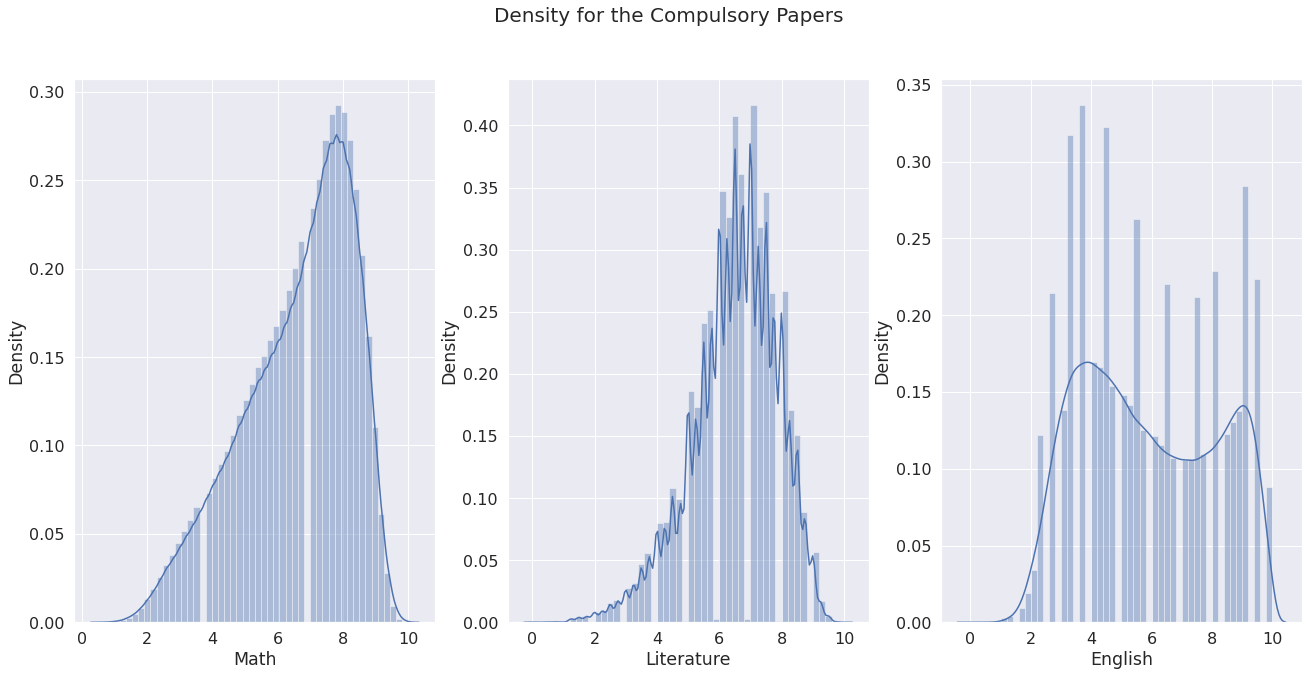

In [47]:
# Density for 3 compulsory independent papers Score
fig, axes = plt.subplots(1, 3, figsize = (22, 10))
sns.distplot(math_dataset_cleaned["Math"], ax = axes[0])
sns.distplot(literature_dataset_cleaned["Literature"], ax = axes[1])
sns.distplot(english_dataset_cleaned["English"], ax = axes[2])
fig.suptitle("Density for the Compulsory Papers", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Density for the Natural Science Combinations')

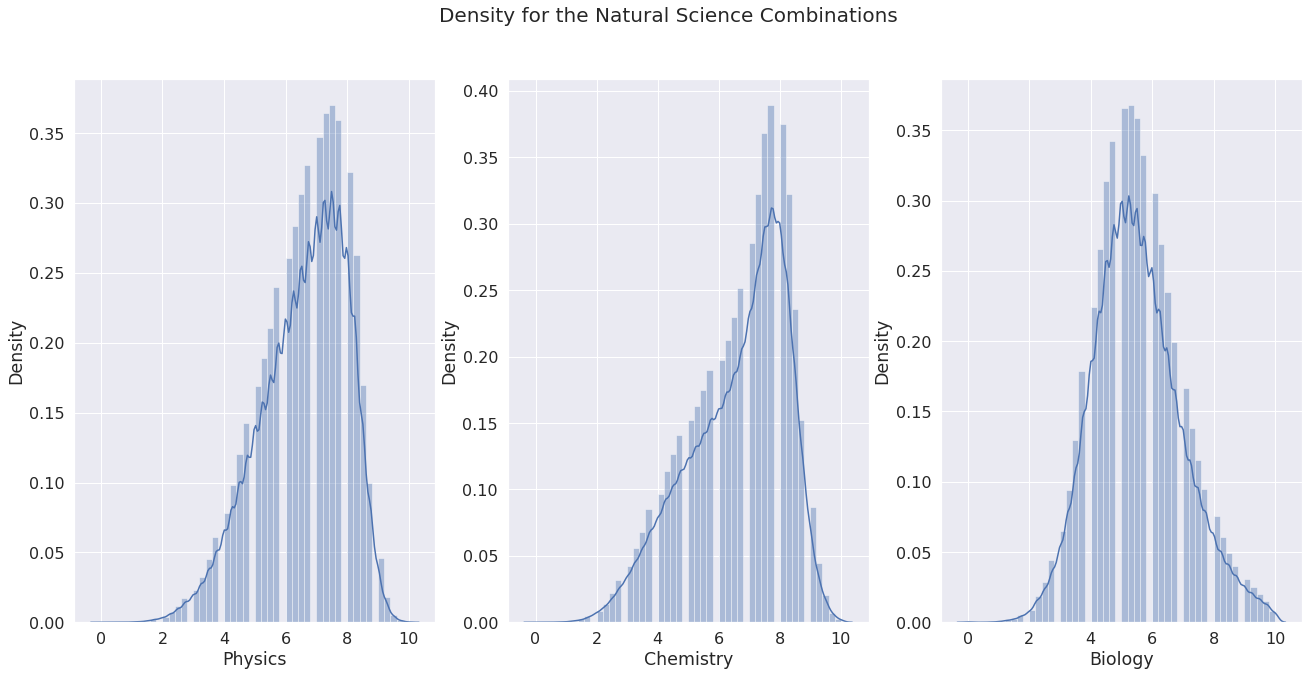

In [48]:
# Density for Social Science Score
fig, axes = plt.subplots(1, 3, figsize = (22, 10))
sns.distplot(physics_dataset_cleaned["Physics"], ax = axes[0])
sns.distplot(chemistry_dataset_cleaned["Chemistry"], ax = axes[1])
sns.distplot(biology_dataset_cleaned["Biology"], ax = axes[2])
fig.suptitle("Density for the Natural Science Combinations", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Density for the Social Science Combinations')

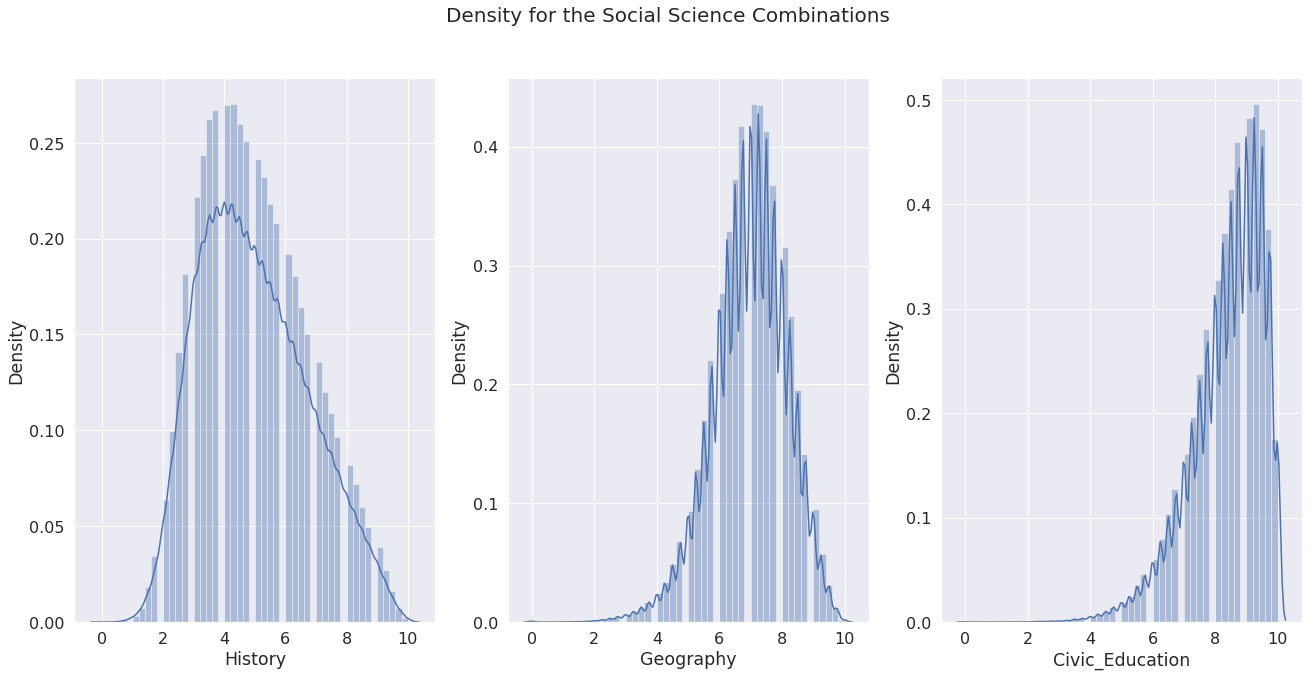

In [49]:
# Density for Social Science Score
fig, axes = plt.subplots(1, 3, figsize = (22, 10))
sns.distplot(history_dataset_cleaned["History"], ax = axes[0])
sns.distplot(geography_dataset_cleaned["Geography"] ,ax = axes[1])
sns.distplot(civic_education_dataset_cleaned["Civic_Education"] ,ax = axes[2])
fig.suptitle("Density for the Social Science Combinations", fontsize = 20)

**9.2: General Assessment for Density of the Score Papers**


>    **9.2.1: Compulsory Independent Papers:**
*   Math: Score Density Destination of the Examinee is common with 3 top scores are 7.8 (has 50900 examinees), 8.0 (has 50205 examinees) and 7.6 (has 49978 examinees)
*   Literature: Score Density Destination of the Examinee is common with 3 top scores are 7.0 (has 76402 examiness), 6.5 (has 74634 examiness) and 7.5 (has 63557 examiness)
*   English: Score Density Destination of the Examinee is common with 3 top scores are 4.0 (has 27753 examinees), 3.8 (has 27736 examinees) and 3.6 (has 27361 examinees)


>   **9.2.2: The Combination of Natural Science:** 
*   Physics: Score Density Destination of the Examinee is common with 3 top scores are 7.5 (has 24155 examinees), 7.25 (has 23779 examinees) and 7.75 (has 23458 examinees)
*   Chemistry: Score Density Destination of the Examinee is common with 3 top scores are 7.75 (has 25541 examinees), 8.0 (has 24571 examinees) and 7.5 (has 24159 examinees)
*   Biology: Score Density Destination of the Examinee is common with 3 top scores are 5.25 (has 23752 examinees), 5.0 (has 23589 examinees) and 5.5 (has 23119 examinees)


>    **9.3.3: The Combination of Social Science:** 
*   History: Score Density Destination of the Examinee is common with 3 top scores are 4.25 (has examinees), 4.0 (has examinees) and 3.75 (has examinees)
*   Geography: Score Density Destination of the Examinee is common with 3 top scores are 7.0 (has 51883 examinees), 7.25 (has 51847 examinees) and 6.75 (has 49687 examinees)
*   Civic Education: Score Density Destination of the Examinee is common with 3 top scores are 9.25 (has 49975 examinees), 9.0 (has 48683 examinees), 9.5 (has 47610 examinees)





**10: Visualization for the examiee has failed in papers**



Text(0.5, 1.0, 'Failure Point Distributions')

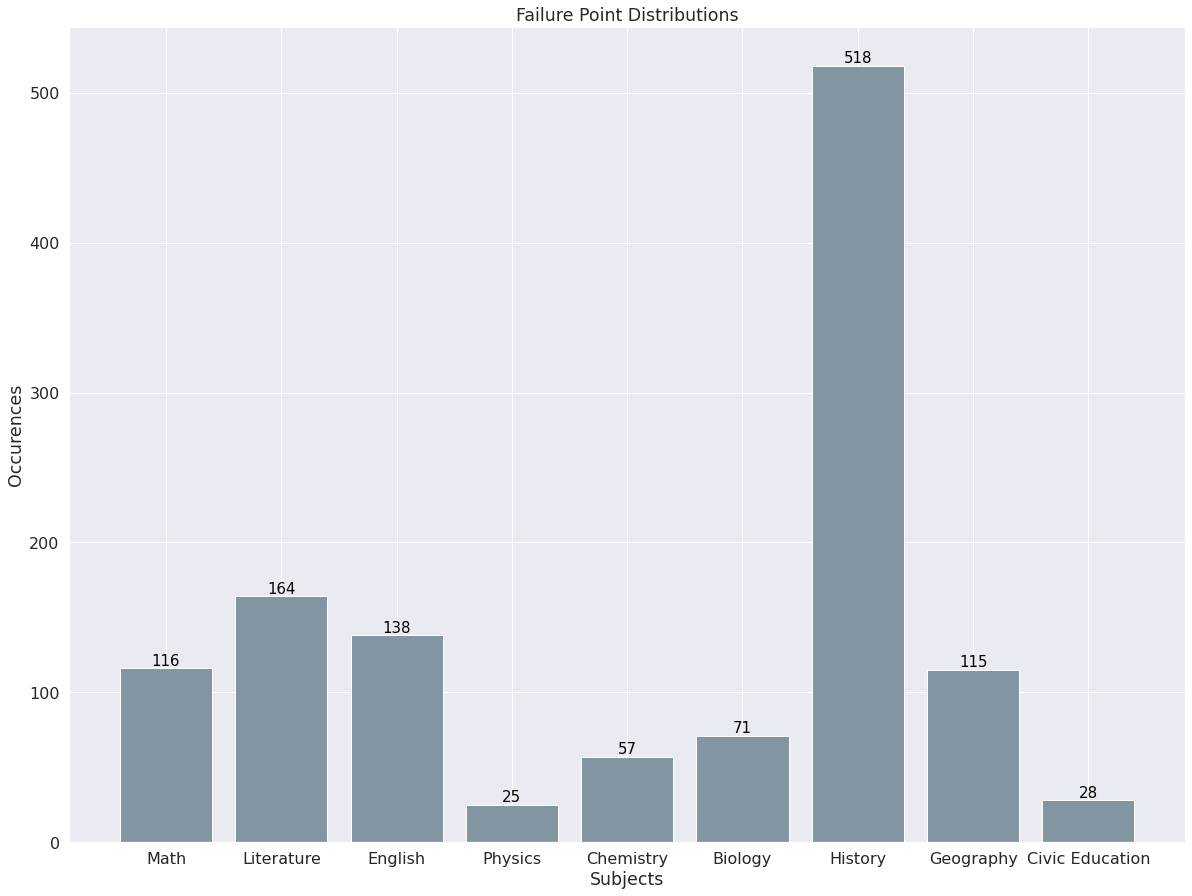

In [50]:
# Count the examiee has failed for Graduation Examination
math_failed = sum(examination_dataset.Math <= 1.0)
literature_failed = sum(examination_dataset.Literature <= 1.0)
english_failed = sum(examination_dataset.English <= 1.0)
physics_failed = sum(examination_dataset.Physics <= 1.0)
chemistry_failed = sum(examination_dataset.Chemistry <= 1.0)
biology_failed = sum(examination_dataset.Biology <= 1.0)
history_failed = sum(examination_dataset.History <= 1.0)
geography_failed = sum(examination_dataset.Geography <= 1.0)
civic_education_failed = sum(examination_dataset.Civic_Education <= 1.0)

list_failed = ["Math", "Literature", "English", "Physics", "Chemistry", "Biology",
              "History", "Geography", "Civic Education"]

counts_failed = [math_failed, literature_failed, english_failed, physics_failed, chemistry_failed,
                 biology_failed, history_failed, geography_failed, civic_education_failed]

plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.45)
failed_grouped = plt.bar(list_failed, counts_failed, color = "#8296A2")

for counts_nope in failed_grouped.patches:
  list_height = counts_nope.get_height()
  label_x = counts_nope.get_x() + counts_nope.get_width() / 2
  label_y = counts_nope.get_y() / list_height + list_height
  plt.text(label_x, label_y, s = f"{list_height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Subjects")
plt.ylabel("Occurences")
plt.title("Failure Point Distributions")

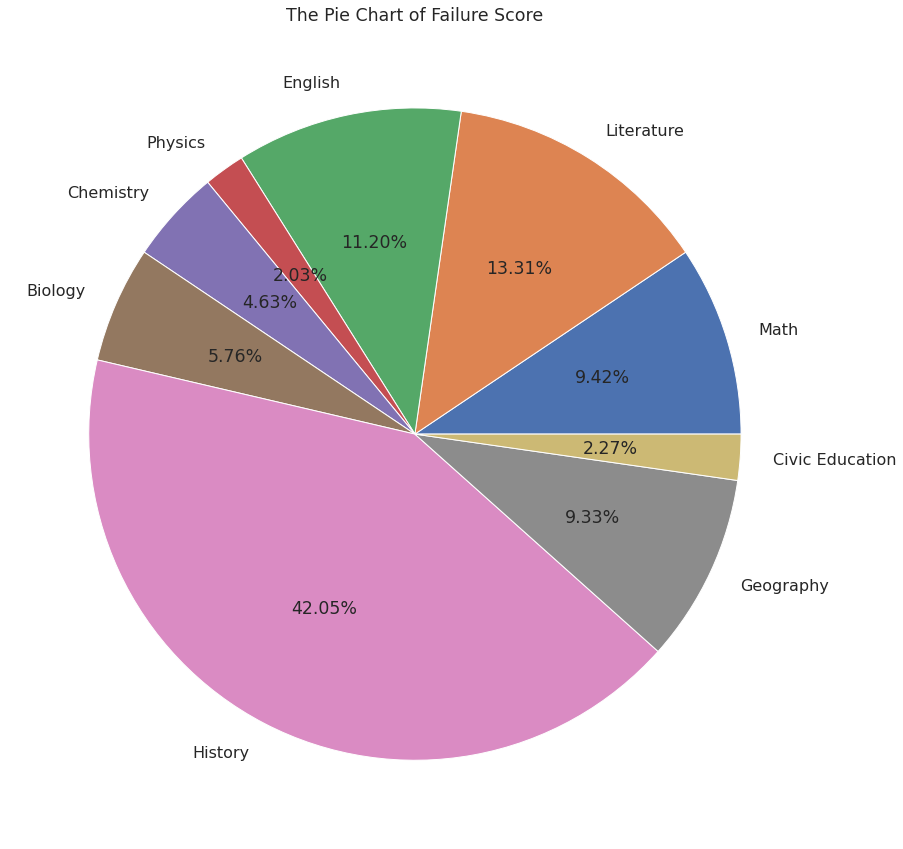

In [51]:
# Create pie chart
plt.figure(figsize = (20, 15))
plt.pie(counts_failed, labels = list_failed, autopct='%0.2f%%')
plt.title("The Pie Chart of Failure Score")
plt.show()

In [52]:
# Sum the examiee has failed score
examinees_failure_score = np.sum(counts_failed)
print("Sum of examinees has been taken failure score are:", examinees_failure_score)

Sum of examinees has been taken failure score are: 1232


**11: Foreign Languages Others (Expect English)**

Text(0.5, 1.0, 'Number of examiee has chosen the foreign language others')

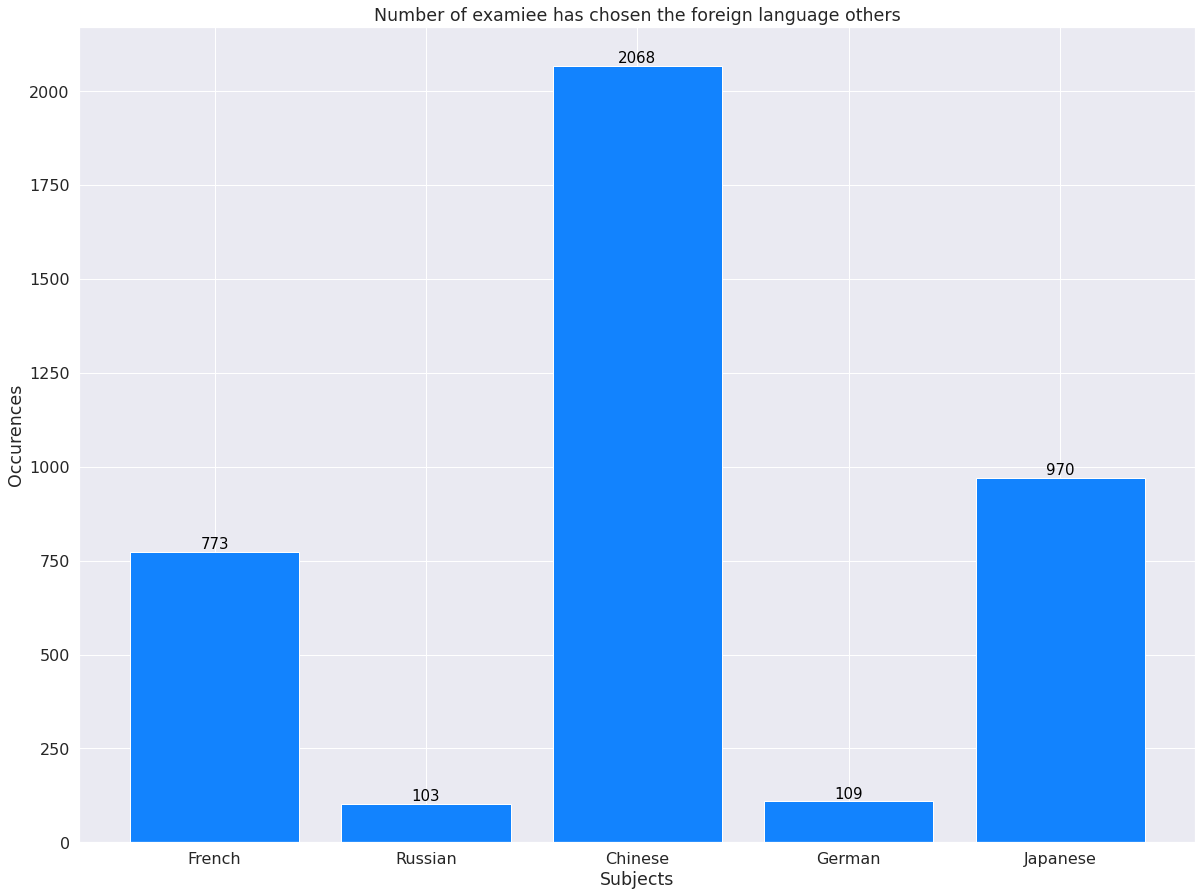

In [53]:
# Count the examiiees has chosen the foregin language others
sum_of_french = sum(examination_dataset.French >= 0)
sum_of_russian = sum(examination_dataset.Russian >= 0)
sum_of_chinese = sum(examination_dataset.Chinese >= 0)
sum_of_german = sum(examination_dataset.German >= 0)
sum_of_japanese = sum(examination_dataset.Japanese >= 0)

labels_foreign_languages = ["French", "Russian", "Chinese", "German", "Japanese"]
counts_foreign_languages = [sum_of_french, sum_of_russian, sum_of_chinese, sum_of_german, sum_of_japanese]

plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.45)
foreign_languages = plt.bar(labels_foreign_languages, counts_foreign_languages, color = "#1283FE")

for counts_other_language in foreign_languages.patches:
  height = counts_other_language.get_height()
  label_x = counts_other_language.get_x() + counts_other_language.get_width() / 2
  label_y = counts_other_language.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel("Subjects")
plt.ylabel("Occurences")
plt.title("Number of examiee has chosen the foreign language others")

In the bar chart, most the examinees has chosen language Chinese, after is Japanese, French, German and Russian in the last place

**12: General Assessment of the High School Graduation Examination 2021**

* In conclusion, it can be said that both the organizer (Ministry of Education and Training) and candidates benefit from the story the graduation examiniation takes place in the complcated phase of the pandemic. From the organizer’s perspective, they benefits from understanding students performance, and their preference to carry out appropriate educational program in the future. By regconizing students weaknesses through low scores distribution in English, History, and Biology, they can adjust the curriculum and exams, or focus on improving student performance in those subjects. 

* The difference in choosing Social Science and Natural Science combination is remarkable but cannot say anything about the probability of having higher score compare to other combination. The grade inflation expressed by a significant high number of 10 points in Civic Education which is worthy for the education expert re-evaluate the exam’s difficulty level. But the failure score (less than 1) in History is top in papers. 2nd is Literature and 3rd is English.

* The trend of choosing English as a foreign language exam accounts for the majority, but the results are still not good which implies for the problem of teaching and learning foreign languages is not guaranteed. From the candidate’s perspective, they benefit from getting good grades to graduate and apply to university (or college). Also, they they are assessed their ability through the Graduation Examination, which is made by their decision in choosing combination, subjects, etc.